<a href="https://colab.research.google.com/github/m-zaniolo/CEE690-ESAA/blob/main/L02_indicators_2025_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2 - indicators

Load data and packages.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 600

url = 'https://raw.githubusercontent.com/m-zaniolo/CEE690-ESAA/main/data/'
inflow = pd.read_csv(url + 'inflow.txt', delimiter='\t', header=None, names=["inflow"]) #m3/s


Pandas offers convenient functionalities to handle dates.

In [ ]:
# generate date array
# Generate the full date range from January 1, 2001, to December 30, 2015
date_range = pd.date_range(start='2001-01-01', end='2015-12-31', freq='D')

# Filter out all February 29 instances
date_range = date_range[~((date_range.month == 2) & (date_range.day == 29))]
inflow.index = date_range

##_Environment: indicators of hydrological alteration_

We consider the inflow as the unaltered flow in the location, and calculate how different reservoir operation strategies impact a representative IHA.


some useful functions:
 `rolling`, `resample`


In [ ]:
# Define the window size for convolution
window_size = 3

# Calculate the rolling window average
rolling_avg = inflow.rolling(window = window_size).sum()

#note: the convolution creates a rolling average array with same length but with Nan values in initial cells
print( 'inflow timeseries length: ' + str( len(inflow) )  )
print( 'inflow rolling average length: ' + str( len(rolling_avg) )  )
print(rolling_avg)

inflow timeseries length: 5475
inflow rolling average length: 5475
             inflow
2001-01-01      NaN
2001-01-02      NaN
2001-01-03  291.436
2001-01-04  294.035
2001-01-05  299.436
...             ...
2015-12-27  176.326
2015-12-28  175.215
2015-12-29  174.081
2015-12-30  173.003
2015-12-31  171.715

[5475 rows x 1 columns]


In [ ]:
# resample for annual values. Max annual 7-day flow
Ny = int( len(inflow) / 365 )
rolling_annual = rolling_avg.resample('YE').max()

print(rolling_annual) # max 7-day flow for every year

             inflow
2001-12-31  2316.09
2002-12-31  2579.38
2003-12-31  2890.50
2004-12-31  4542.00
2005-12-31  5000.70
2006-12-31  4093.10
2007-12-31  2870.20
2008-12-31  2544.00
2009-12-31  2939.05
2010-12-31  3638.70
2011-12-31  2919.80
2012-12-31  2979.90
2013-12-31  3080.30
2014-12-31  3434.00
2015-12-31  3416.60


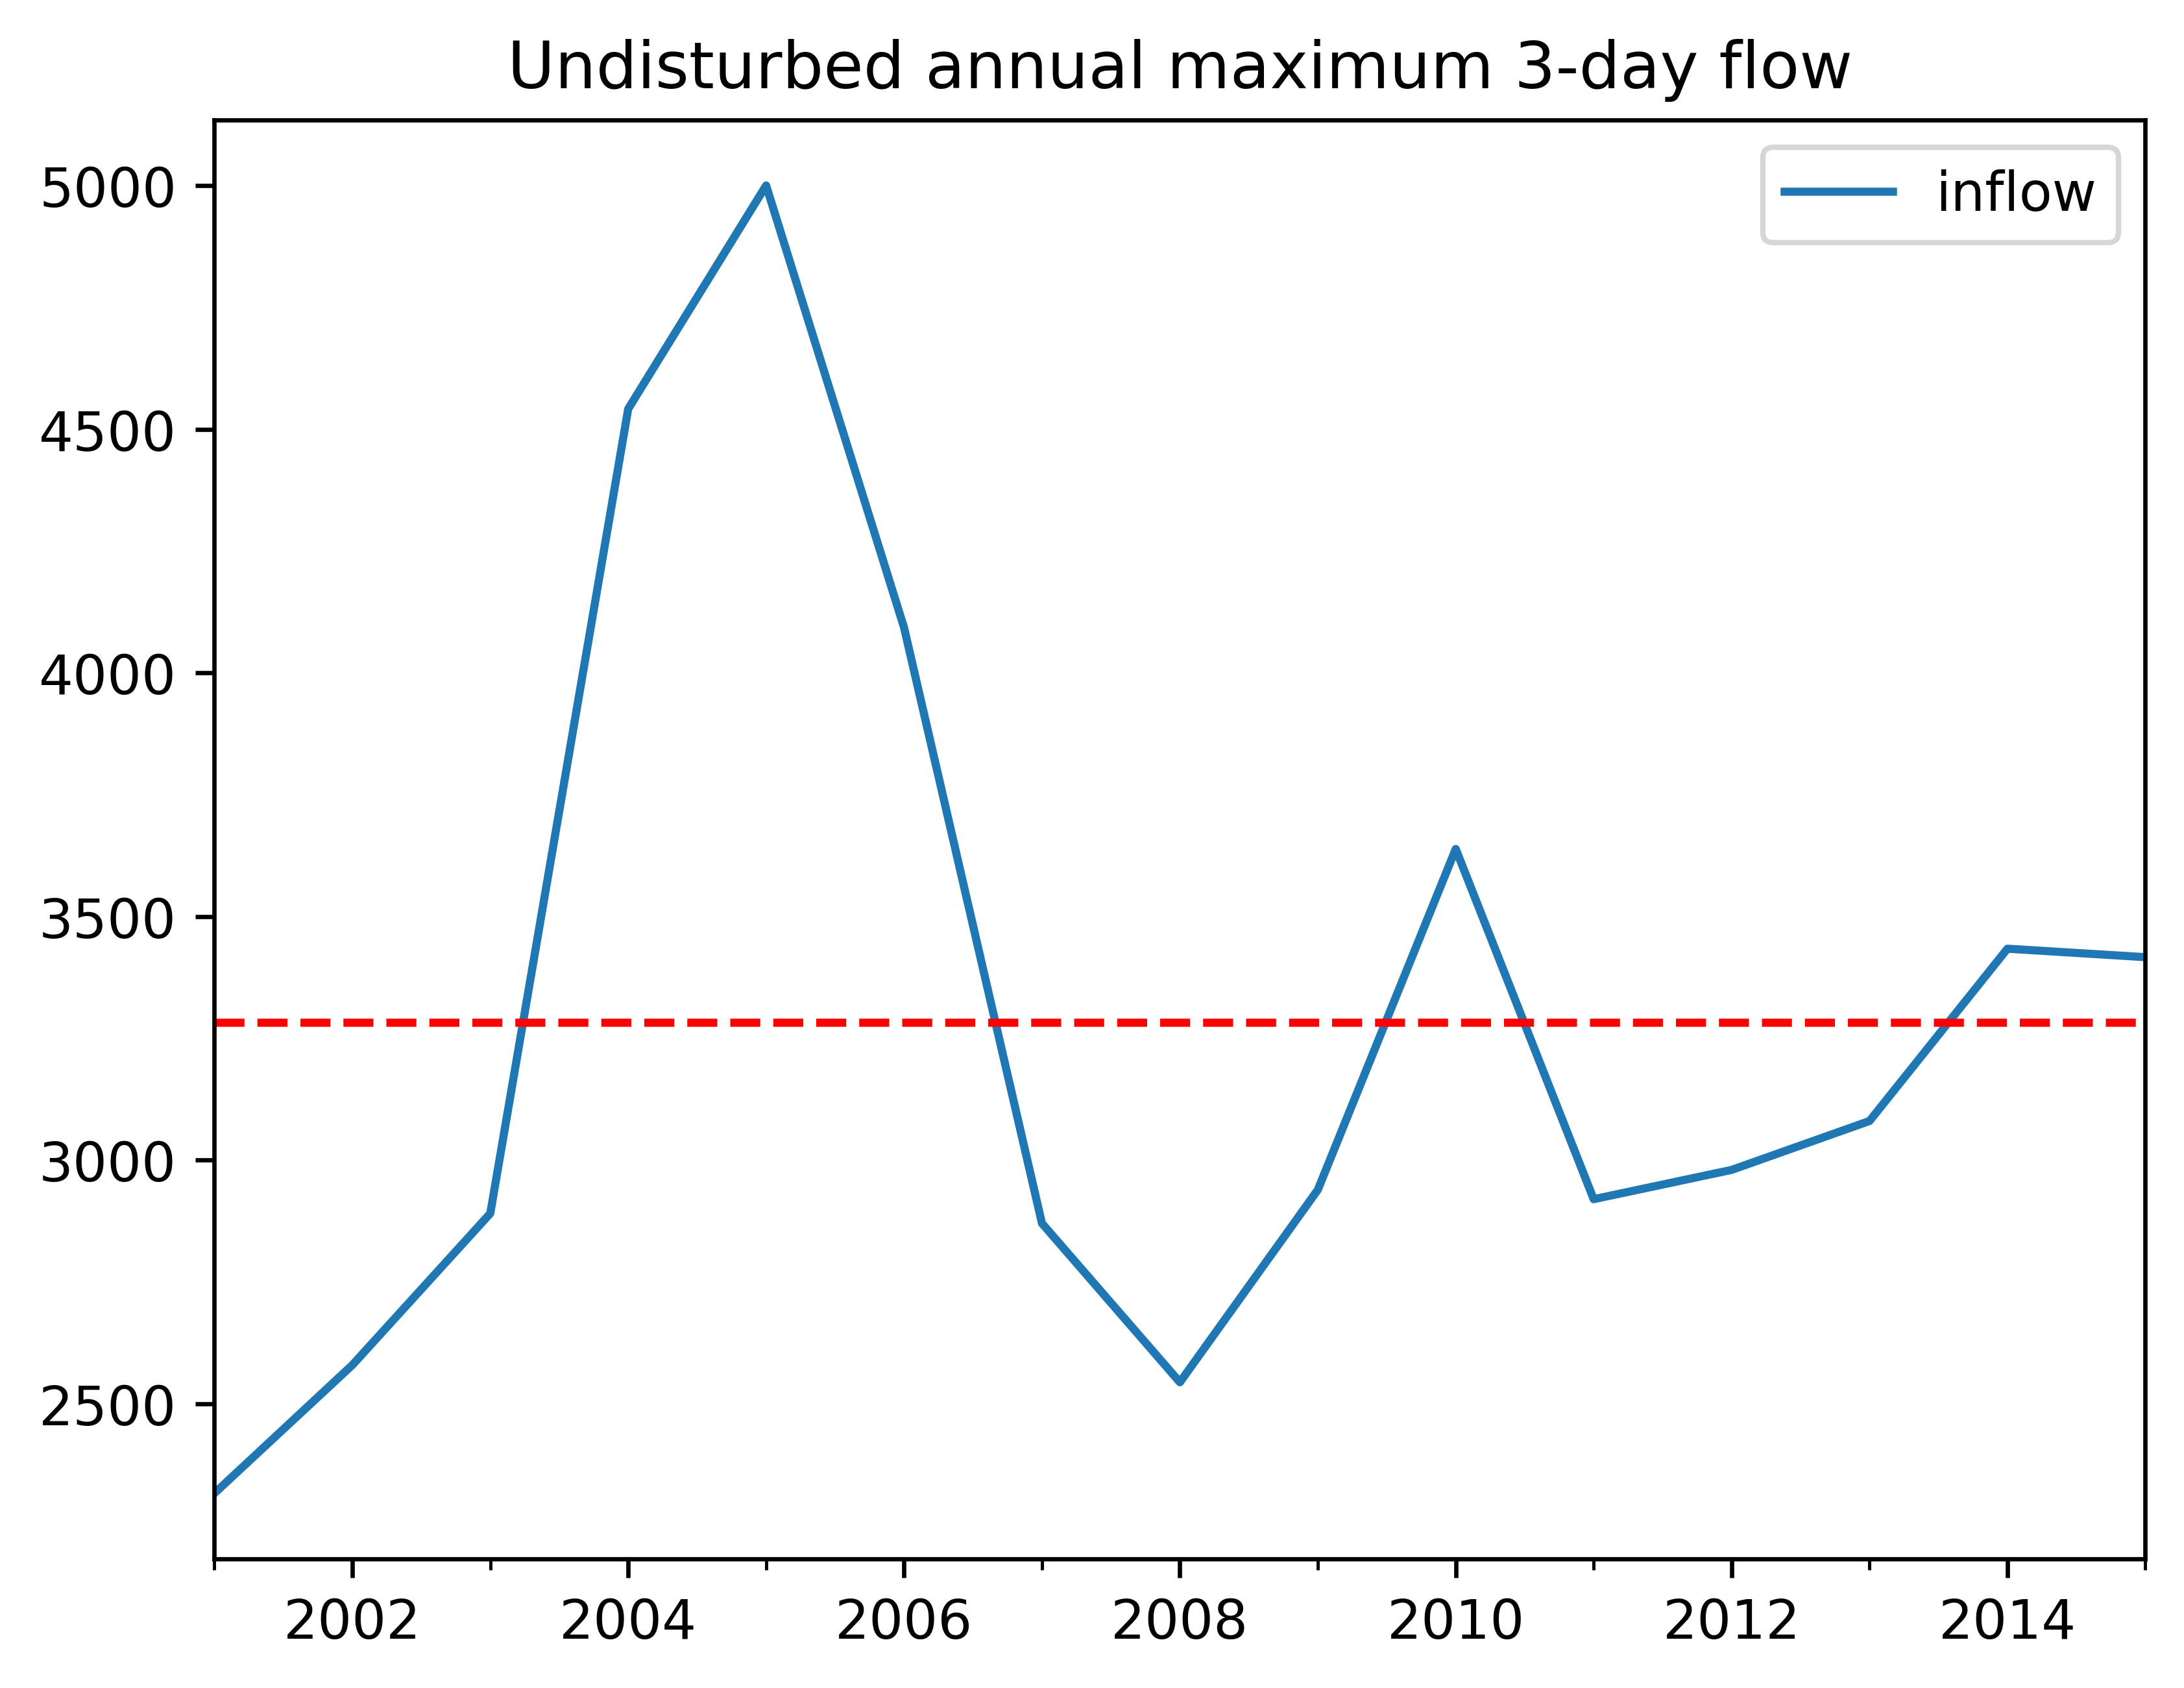

In [ ]:
# Plot this

rolling_annual.plot()
# Plot the average maximum value as a dashed horizontal line
plt.axhline(rolling_annual['inflow'].mean(), color='r', linestyle='--')


plt.title('Undisturbed annual maximum 3-day flow')
plt.show()

**How much do the considered release strategies alter the average annual 3-day peak flow?**



Now let's see how different release alternatives modify this IHA

<Axes: >

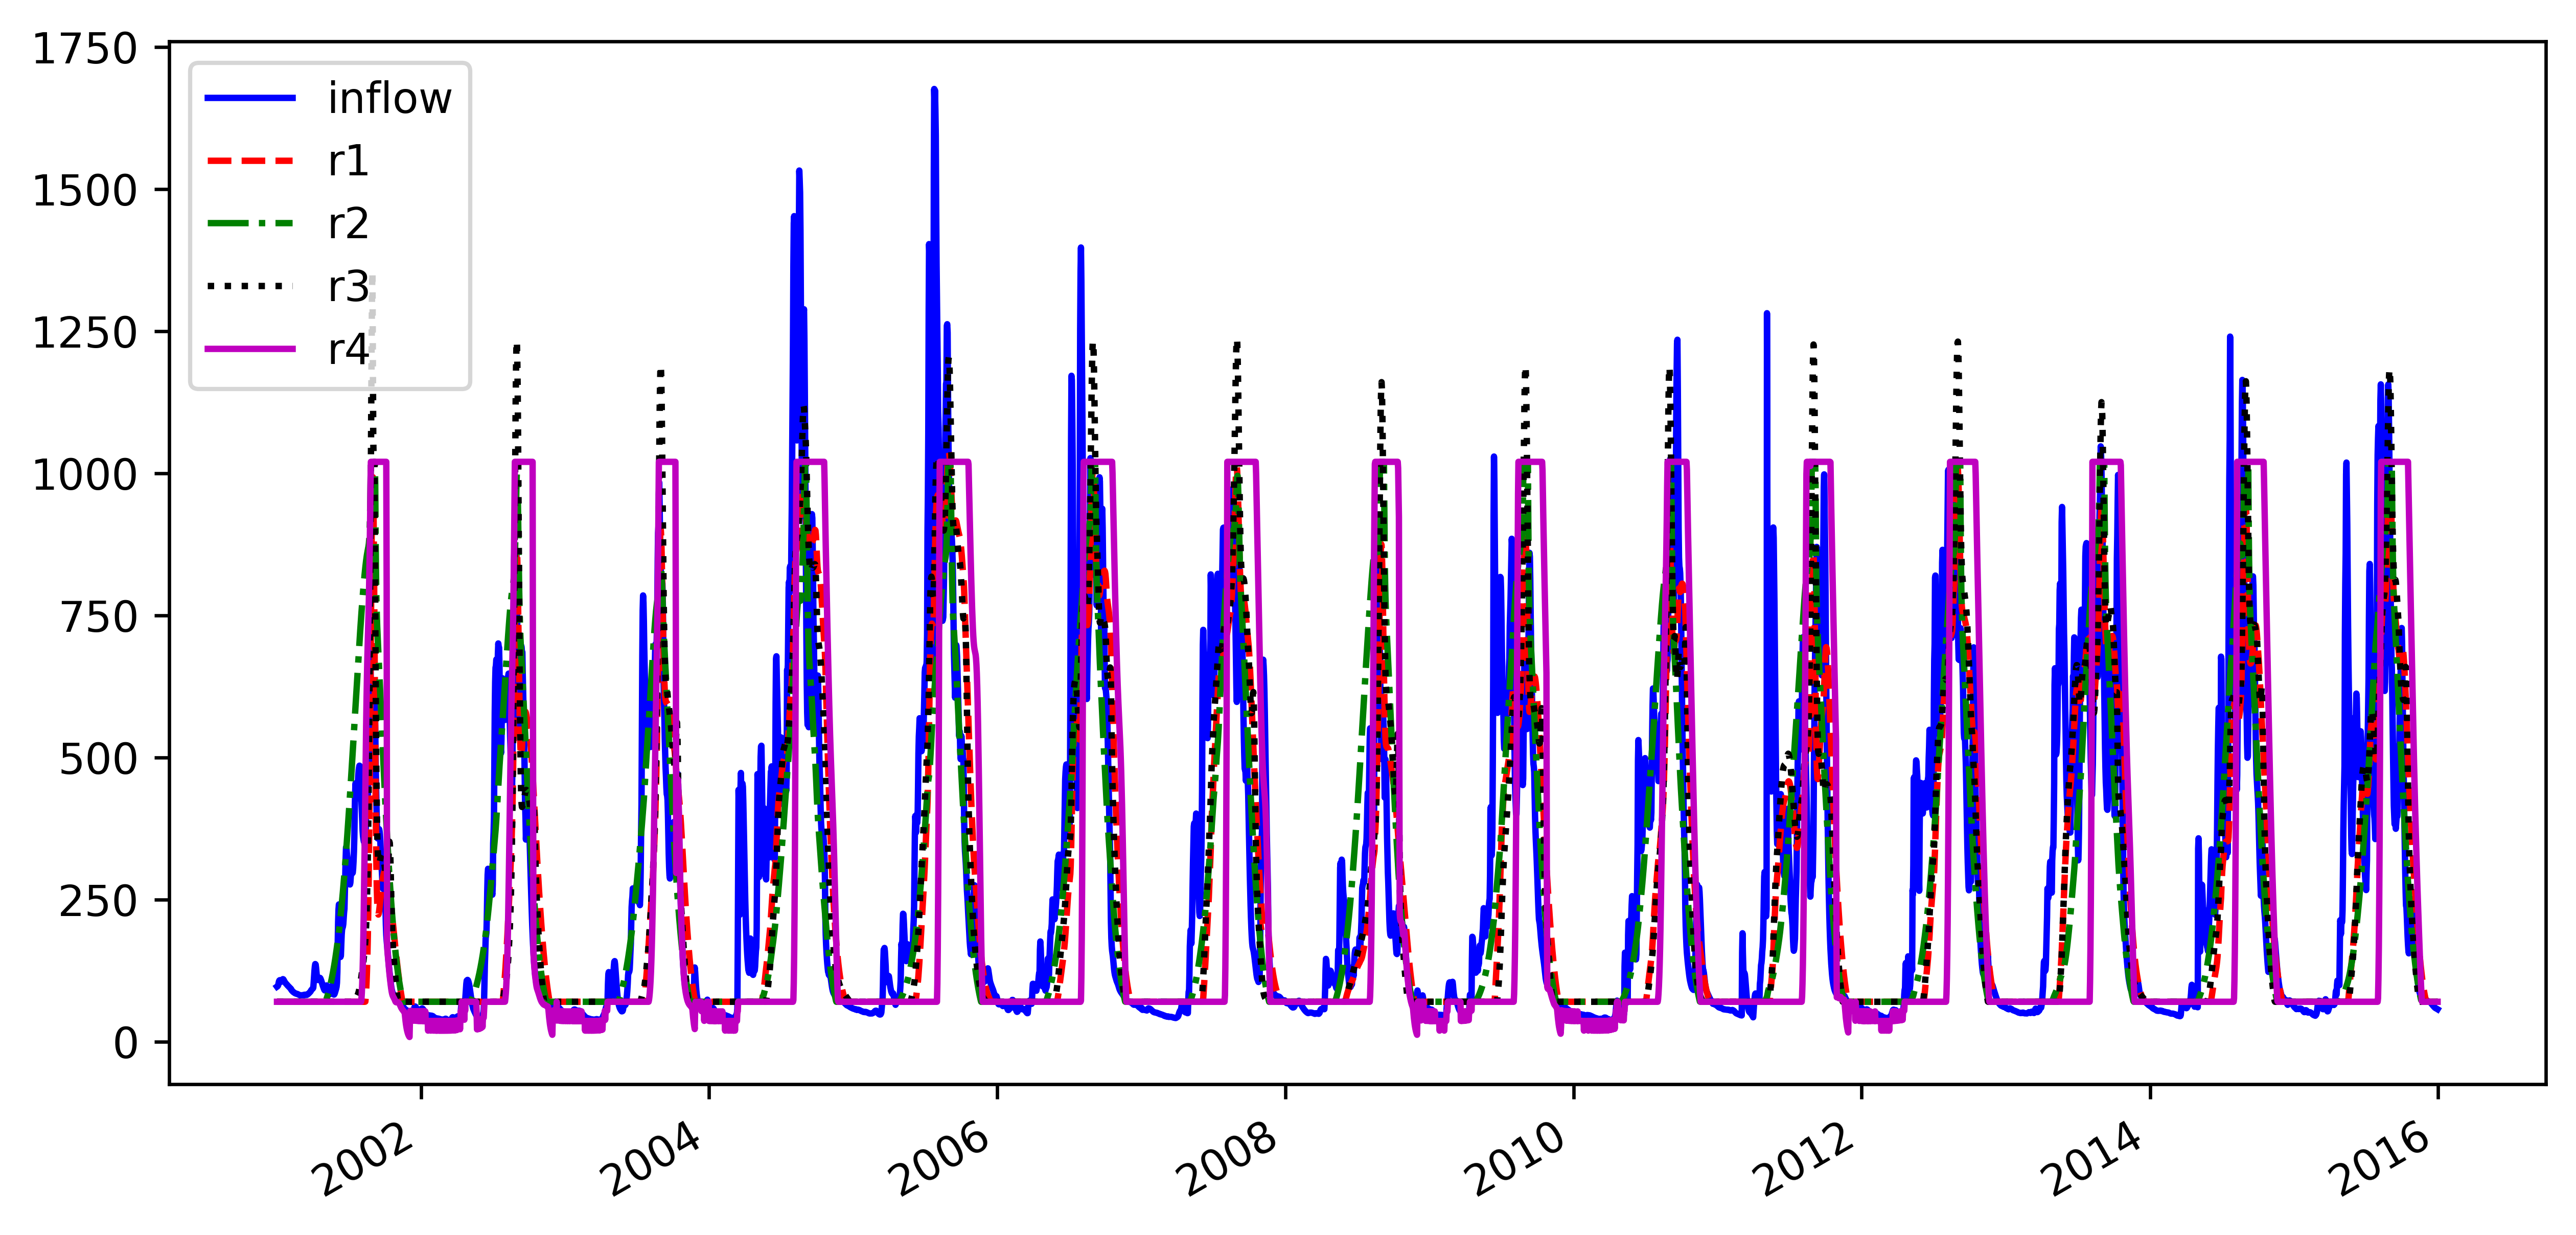

In [ ]:
# Load release alternatives and set dates
r1 = pd.read_csv(url + 'release1.txt', delimiter='\t', header=None, names=["r1"]) #m3/s
r2 = pd.read_csv(url + 'release2.txt', delimiter='\t', header=None, names=["r2"]) #m3/s
r3 = pd.read_csv(url + 'release3.txt', delimiter='\t', header=None, names=["r3"]) #m3/s
r4 = pd.read_csv(url + 'release4.txt', delimiter='\t', header=None, names=["r4"]) #m3/s

r1.index = date_range
r2.index = date_range
r3.index = date_range
r4.index = date_range

# let's have a look at these
fig, ax = plt.subplots(figsize=(10, 5))

inflow.plot(ax = ax, color = 'b', linestyle='-') #ax = ax so all lines are plotted in the same figure
r1.plot(ax = ax, color = 'r', linestyle='--')
r2.plot(ax = ax, color = 'g', linestyle='-.')
r3.plot(ax = ax, color = 'k', linestyle=':')
r4.plot(ax = ax, color = 'm', linestyle='-')



Text(0.5, 1.0, 'Average annual deviation from average annual 3-day peak flow')

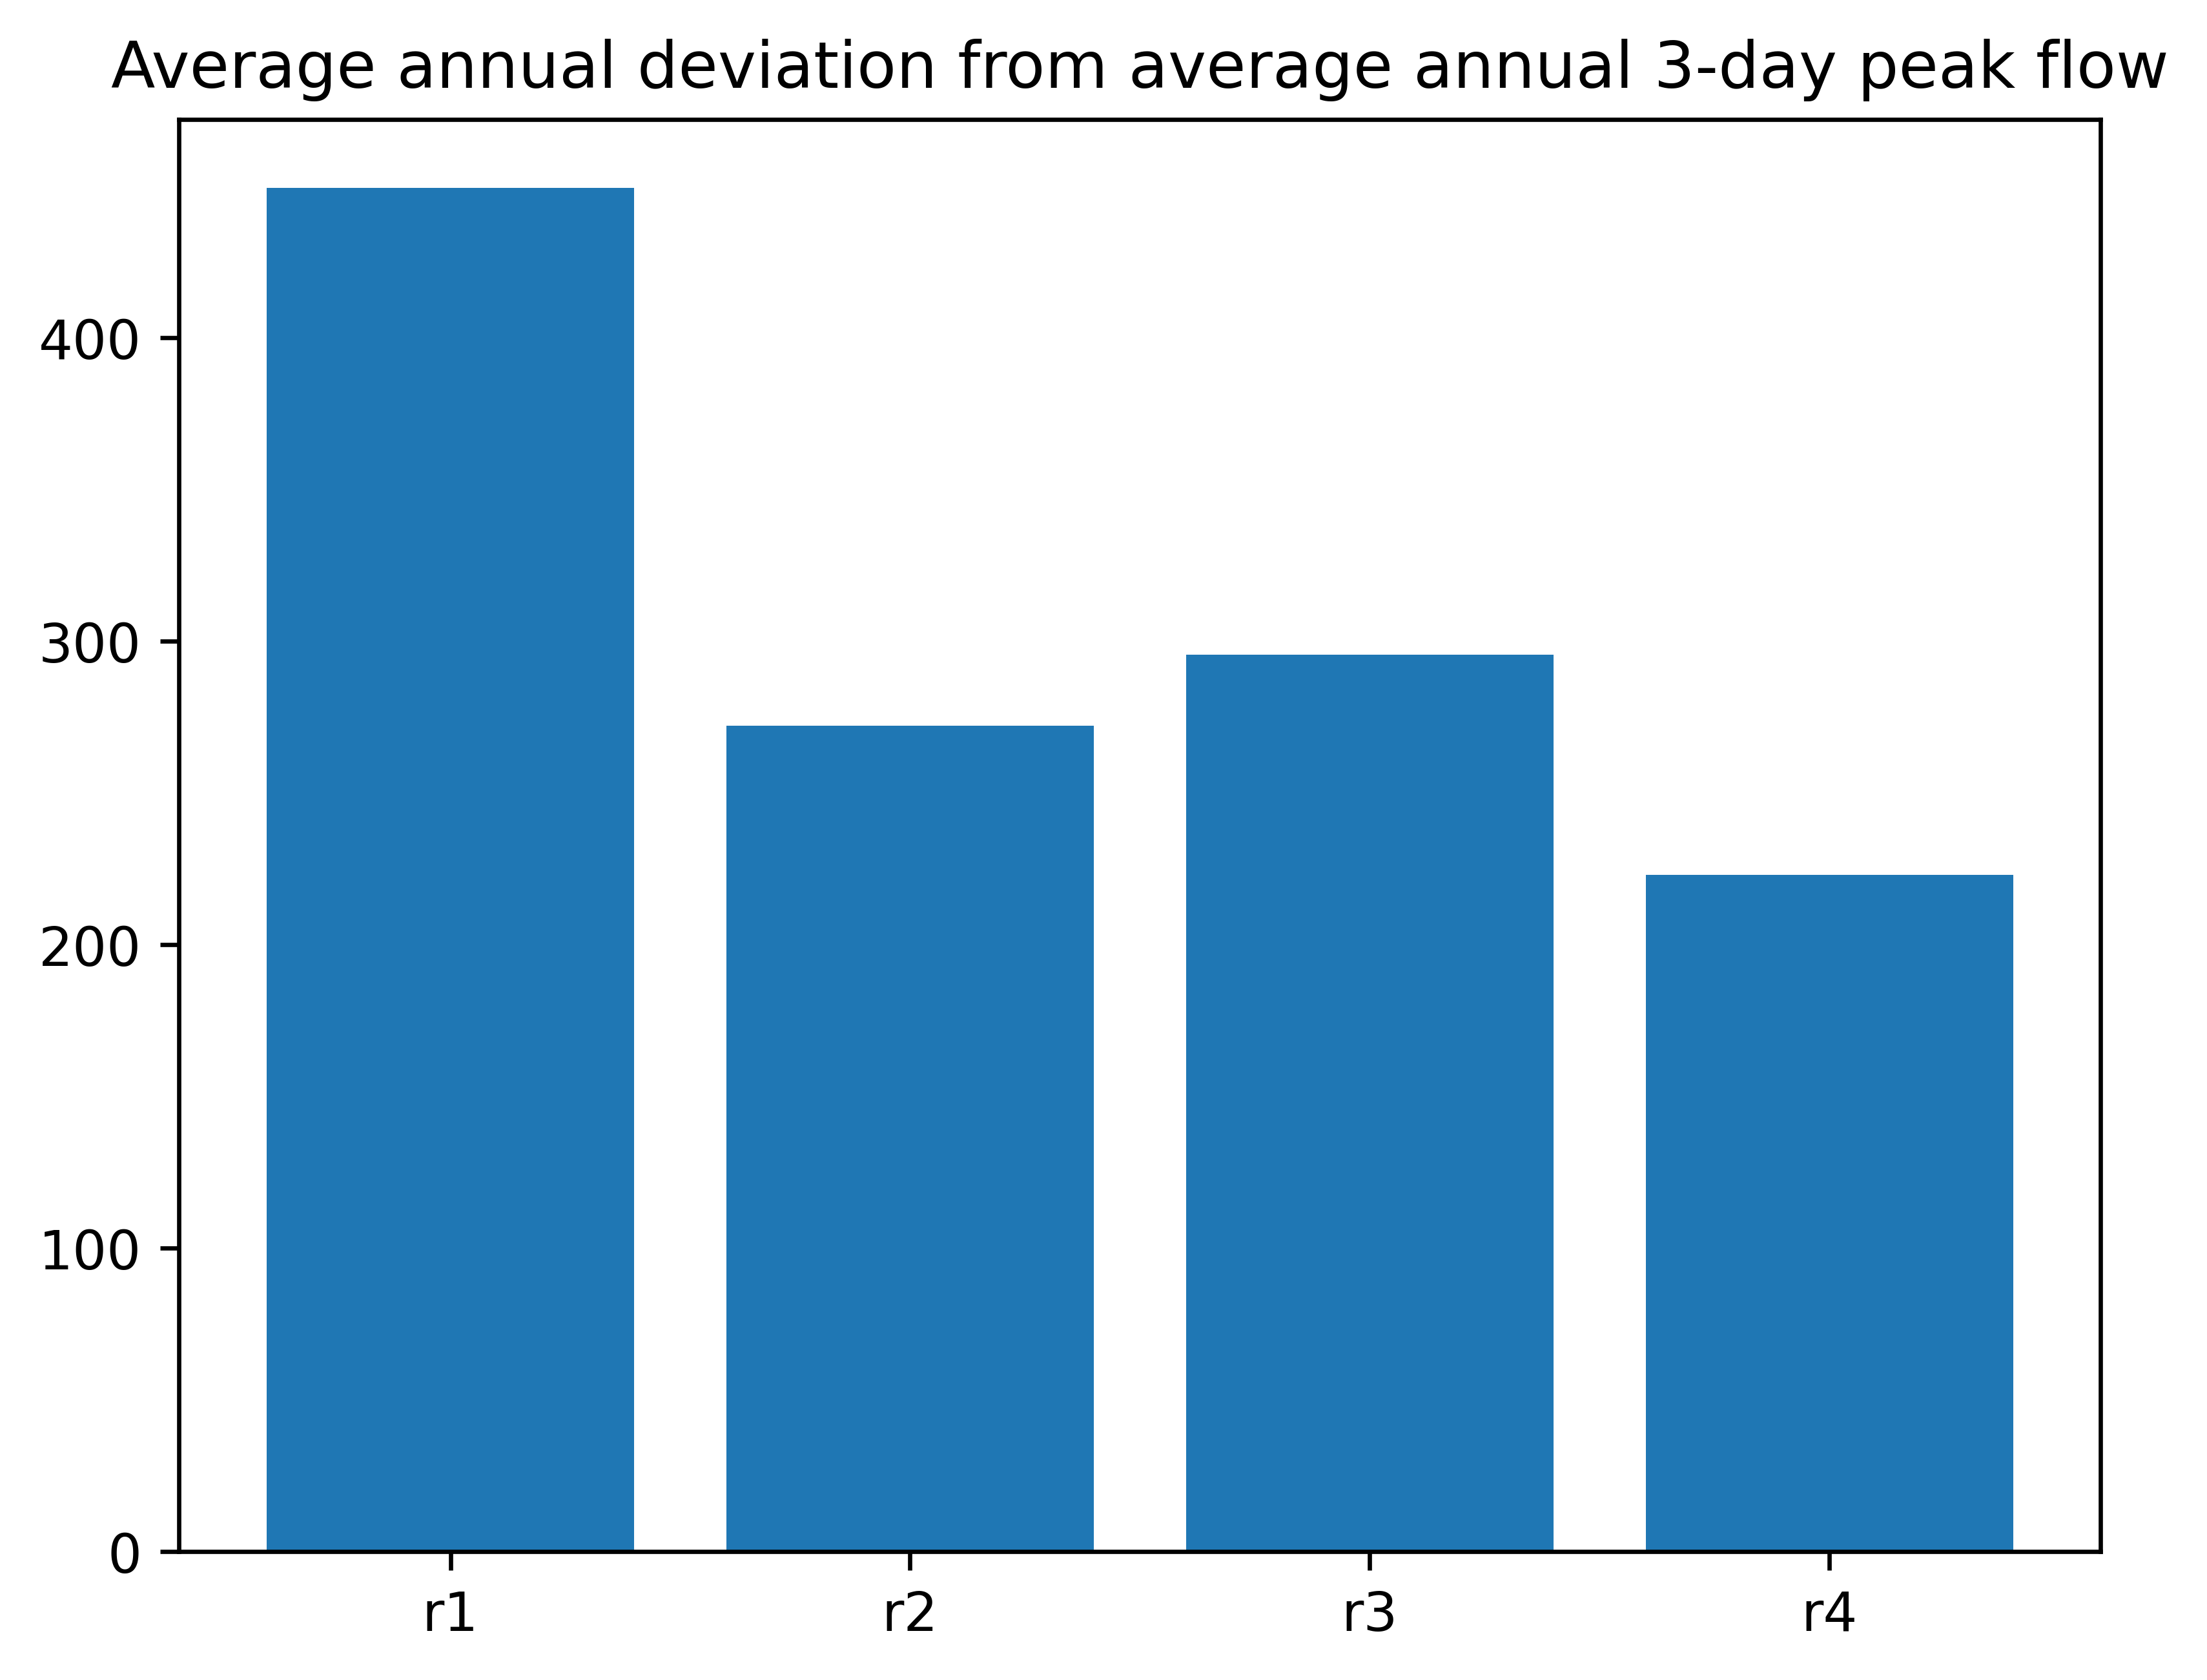

In [ ]:
# Calculate IHA for different release strategies

r1_m3d = r1.rolling(window=window_size).sum().resample('YE').max()
r2_m3d = r2.rolling(window=window_size).sum().resample('YE').max()
r3_m3d = r3.rolling(window=window_size).sum().resample('YE').max()
r4_m3d = r4.rolling(window=window_size).sum().resample('YE').max()


HPulse_i = rolling_annual['inflow'].mean()
HPulse_r1 = r1_m3d['r1'].mean()
HPulse_r2 = r2_m3d['r2'].mean()
HPulse_r3 = r3_m3d['r3'].mean()
HPulse_r4 = r4_m3d['r4'].mean()

Jenv1 = [np.abs(HPulse_i - HPulse_r1),
        np.abs(HPulse_i - HPulse_r2),
        np.abs(HPulse_i - HPulse_r3),
        np.abs(HPulse_i - HPulse_r4)]

labels = ['r1', 'r2', 'r3', 'r4']
# Creating the bar plot
plt.bar(labels, Jenv1)
plt.title('Average annual deviation from average annual 3-day peak flow')



Another relevant indicator may be the average flow in August, when recession agriculture is performed.

In [ ]:
monthly_inflow = inflow.resample('ME').sum()
august_avg_inflow = monthly_inflow.loc[monthly_inflow.index.month == 8].mean()

print(august_avg_inflow)

inflow    23176.046
dtype: float64


Text(0.5, 1.0, 'Average annual deviation from average August flow')

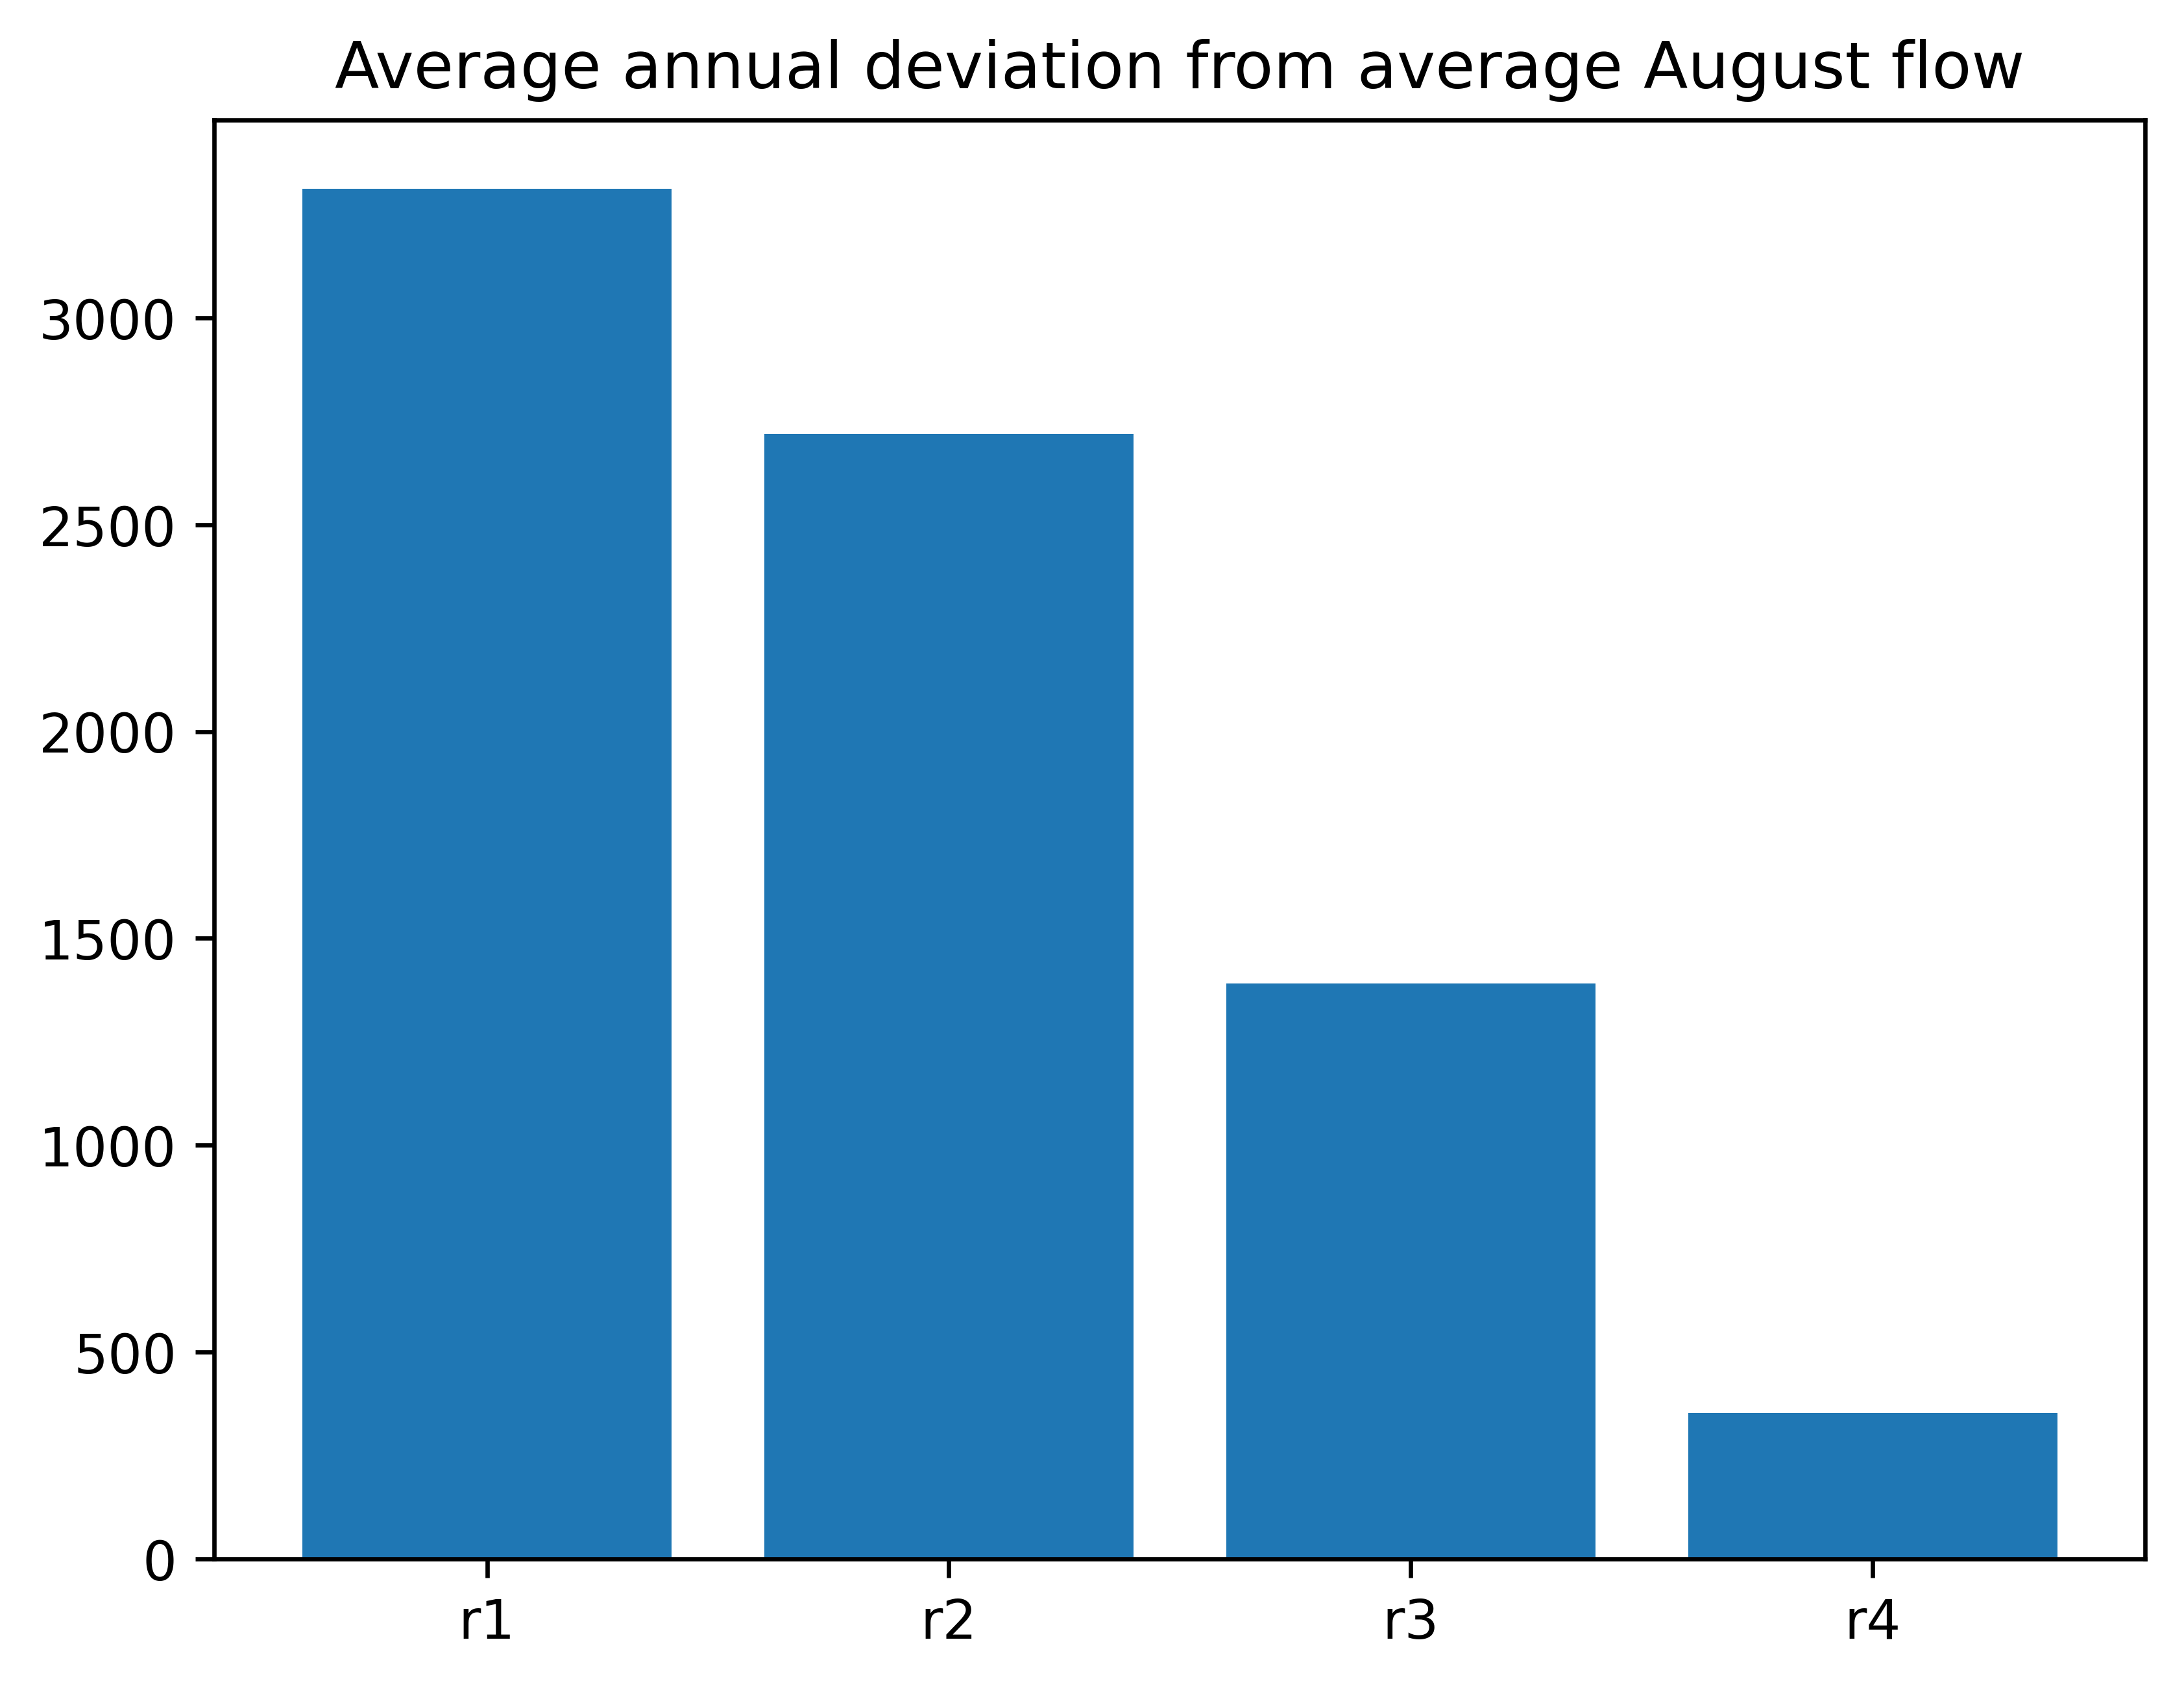

In [ ]:
month_r1 = r1.resample('ME').sum()
aug_r1 = month_r1.loc[month_r1.index.month == 8].mean()

month_r2 = r2.resample('ME').sum()
aug_r2 = month_r2.loc[month_r2.index.month == 8].mean()

month_r3 = r3.resample('ME').sum()
aug_r3 = month_r3.loc[month_r3.index.month == 8].mean()

month_r4 = r4.resample('ME').sum()
aug_r4 = month_r4.loc[month_r4.index.month == 8].mean()

Jenv2 = [ np.abs(august_avg_inflow['inflow']  - aug_r1['r1']),
          np.abs(august_avg_inflow['inflow']  - aug_r2['r2']),
          np.abs(august_avg_inflow['inflow']  - aug_r3['r3']),
          np.abs(august_avg_inflow['inflow']  - aug_r4['r4'])]

# Creating the bar plot
plt.bar(labels, Jenv2)
plt.title('Average annual deviation from average August flow')



---



##_Energy: hydropower production_


hydropower production can be calculated as:


hp = level * release * effic * ρ * g (W)

where ρ = 1000 kg/m3
g = 9.81 m/s2  acceleration of gravity.

To convert values to [MW] we divide by 10e6

Let's load the level timeseries we calculated last time

In [ ]:
l1 = pd.read_csv(url + 'level1.txt', delimiter='\t', header=None, names=["l1"])[1:]
l2 = pd.read_csv(url + 'level2.txt', delimiter='\t', header=None, names=["l2"])[1:]
l3 = pd.read_csv(url + 'level3.txt', delimiter='\t', header=None, names=["l3"])[1:]
l4 = pd.read_csv(url + 'level4.txt', delimiter='\t', header=None, names=["l4"])[1:]

l1.index = date_range
l2.index = date_range
l3.index = date_range
l4.index = date_range

timseries of hydropower production:

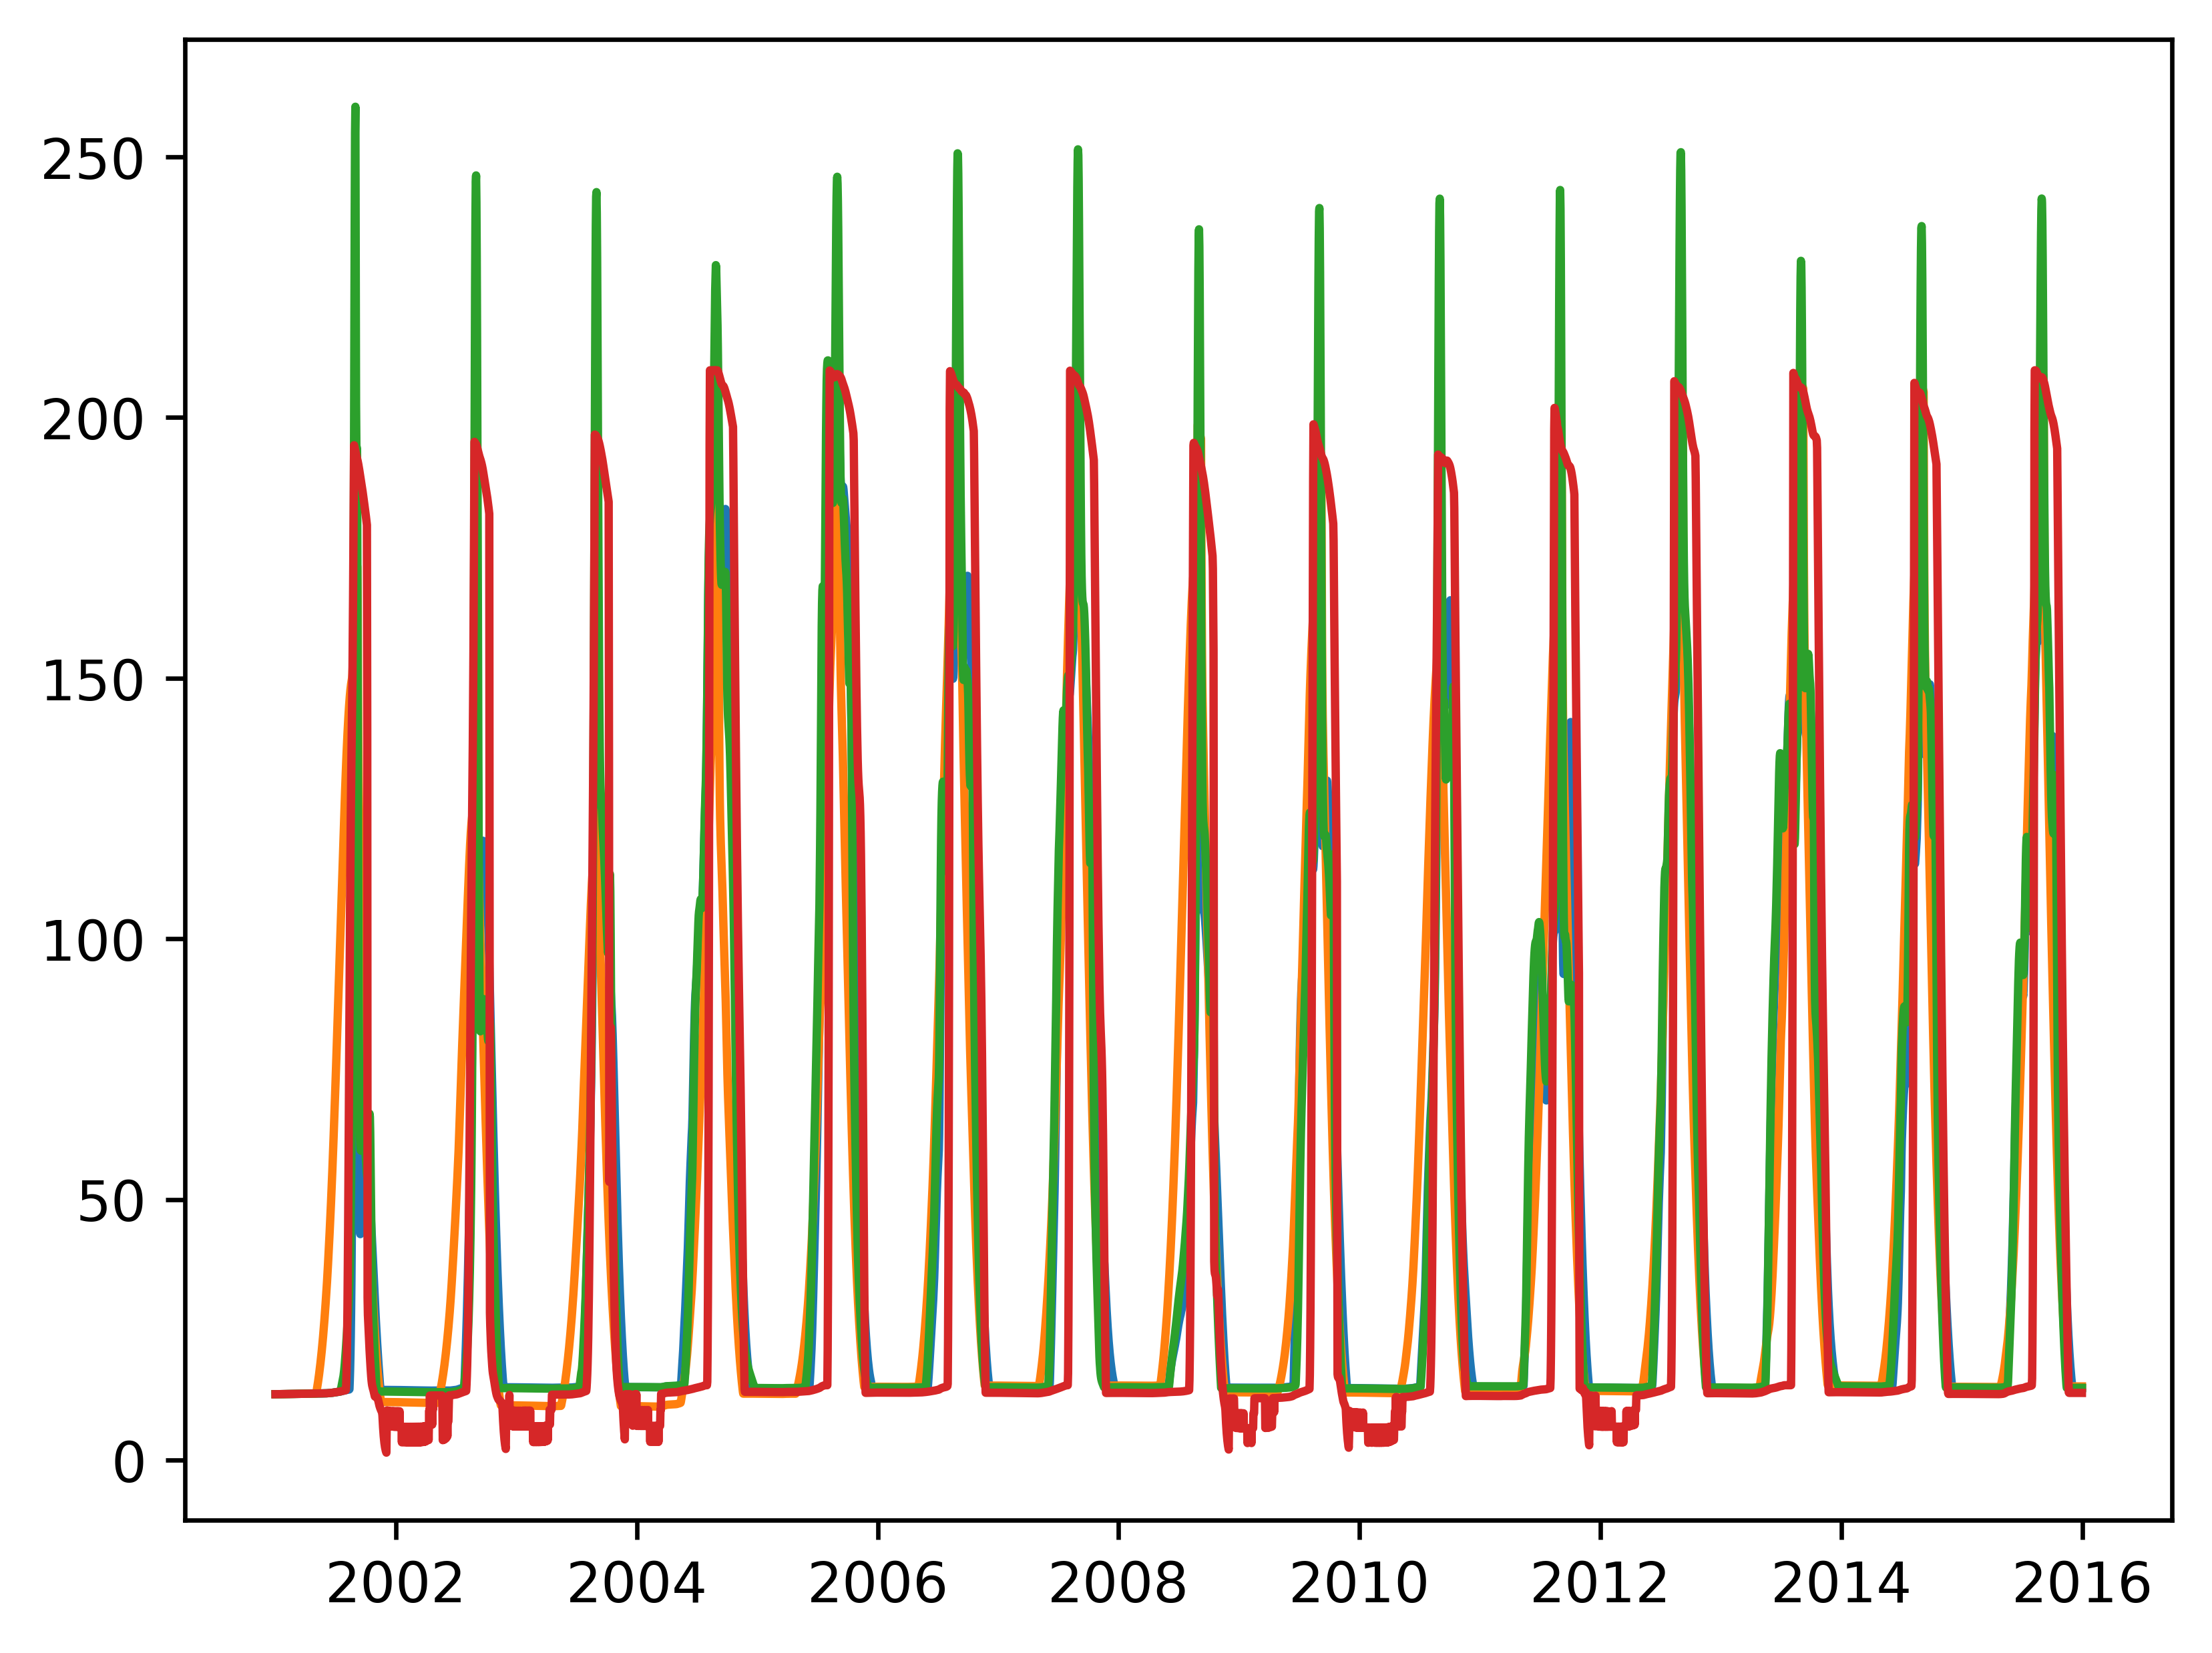

In [ ]:
efficiency = 0.9 # in realty, turbine efficiency is more complicated than a simple constant
g = 9.81
d = 1000

hp1 = l1['l1']*r1['r1']*efficiency*g*d/10e6
hp2 = l2['l2']*r2['r2']*efficiency*g*d/10e6
hp3 = l3['l3']*r3['r3']*efficiency*g*d/10e6
hp4 = l4['l4']*r4['r4']*efficiency*g*d/10e6

plt.plot(hp1)
plt.plot(hp2)
plt.plot(hp3)
plt.plot(hp4)

Aggregate hydropower production time series into a single indicator:

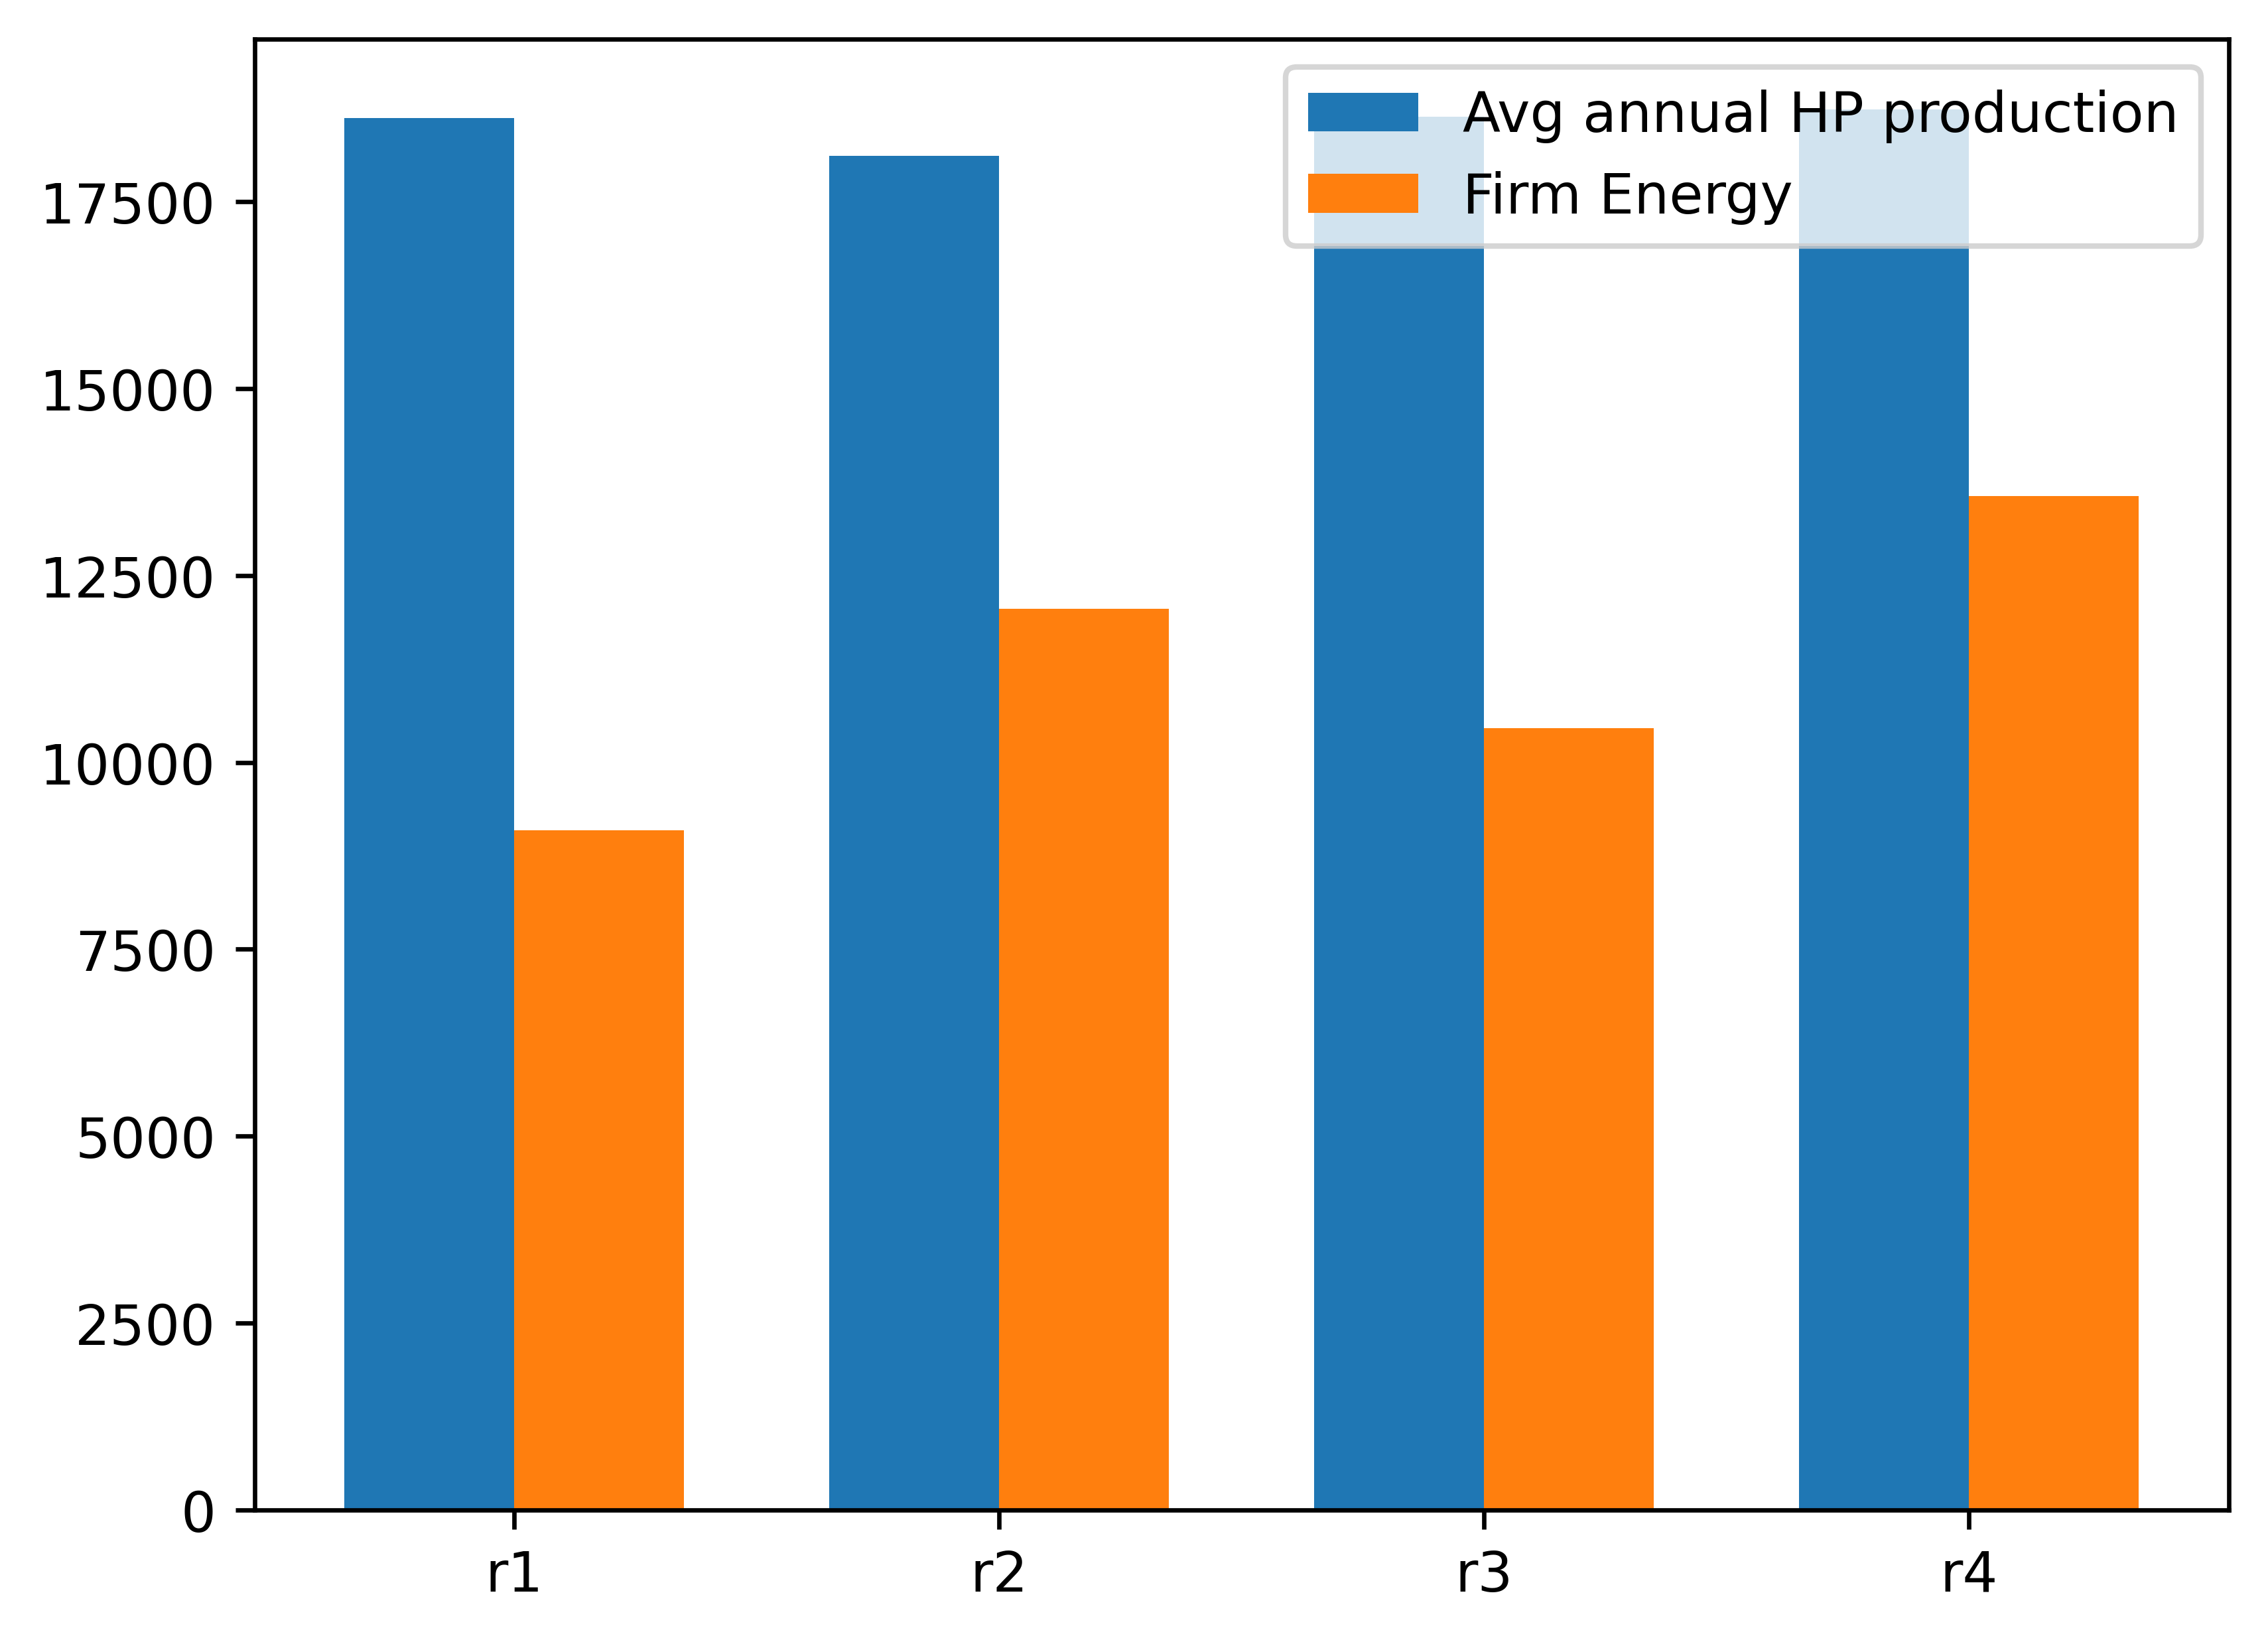

In [ ]:
# option 1: average annual production

Jenergy1 = [ np.mean(hp1)*365, np.mean(hp2)*365, np.mean(hp3)*365, np.mean(hp4)*365]

# option 2: firm energy - minimum annual production
annual_hp1 = hp1.resample('YE').sum()
annual_hp2 = hp2.resample('YE').sum()
annual_hp3 = hp3.resample('YE').sum()
annual_hp4 = hp4.resample('YE').sum()

Jenergy2 = [ annual_hp1.min(), annual_hp2.min(), annual_hp3.min(), annual_hp4.min() ]

#visualize both indicators
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Jenergy1, width, label='Avg annual HP production')
rects2 = ax.bar(x + width/2, Jenergy2, width, label='Firm Energy')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()



---




##_Food: agricultural production_



We can evaluate this in terms of level of satisfaction of an agricultural demand. A squared formulation allows to penalize large concentrated deficit

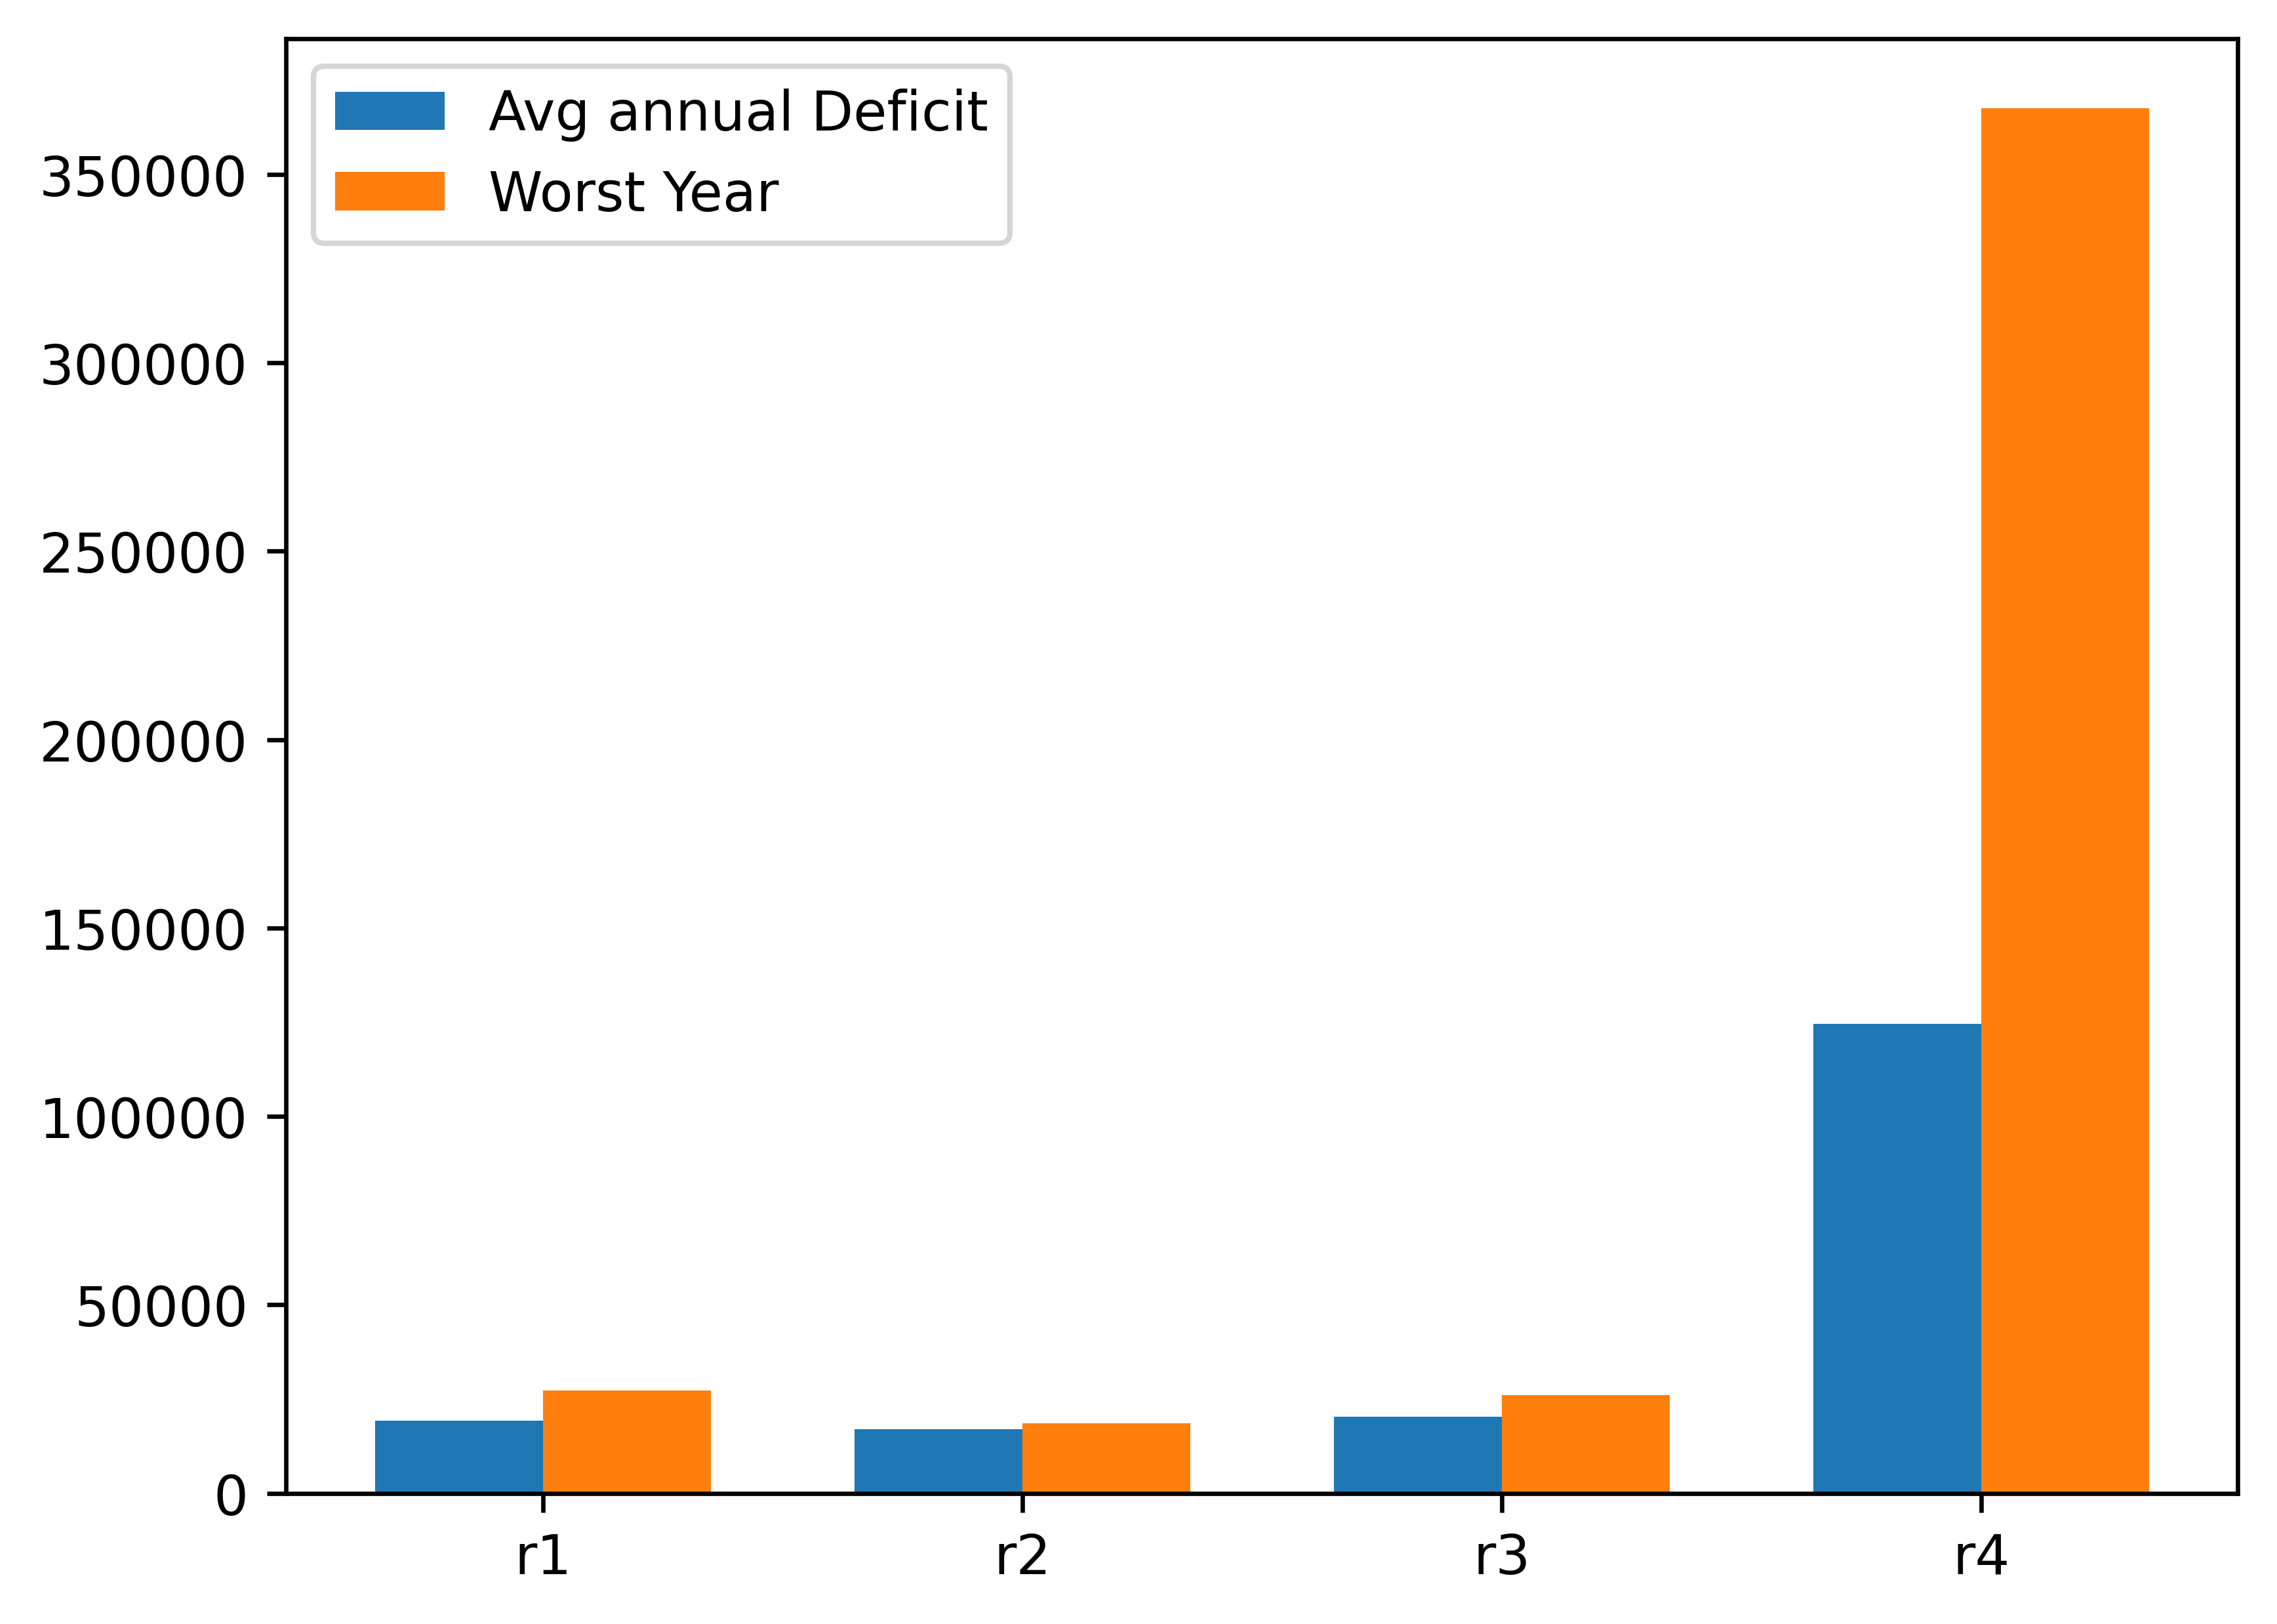

In [ ]:
D = 80 #assume daily constant water demand in m3/s
N = 2  # crop dependent
# calculate timeseries of agricultural deficit (ad)

ad_r1 = (np.maximum(D - r1, 0 )) ** N
ad_r2 = (np.maximum(D - r2, 0 )) ** N
ad_r3 = (np.maximum(D - r3, 0 )) ** N
ad_r4 = (np.maximum(D - r4, 0 )) ** N

# aggregate time series.

#Option 1: avg annual deficit
Jfood1 = [ np.mean(ad_r1)*365, np.mean(ad_r2)*365, np.mean(ad_r3)*365, np.mean(ad_r4)*365 ]

# Option 2: worst year
annual_ad1 = ad_r1.resample('YE').sum()
annual_ad2 = ad_r2.resample('YE').sum()
annual_ad3 = ad_r3.resample('YE').sum()
annual_ad4 = ad_r4.resample('YE').sum()

Jfood2 = [ np.max(annual_ad1), np.max(annual_ad2), np.max(annual_ad3), np.max(annual_ad4) ]

labels = ['r1', 'r2', 'r3', 'r4']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Jfood1, width, label='Avg annual Deficit')
rects2 = ax.bar(x + width/2, Jfood2, width, label='Worst Year')

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

---
## _Flood indicators_

for example, flood on lake shores when lake level > dam height

<BarContainer object of 4 artists>

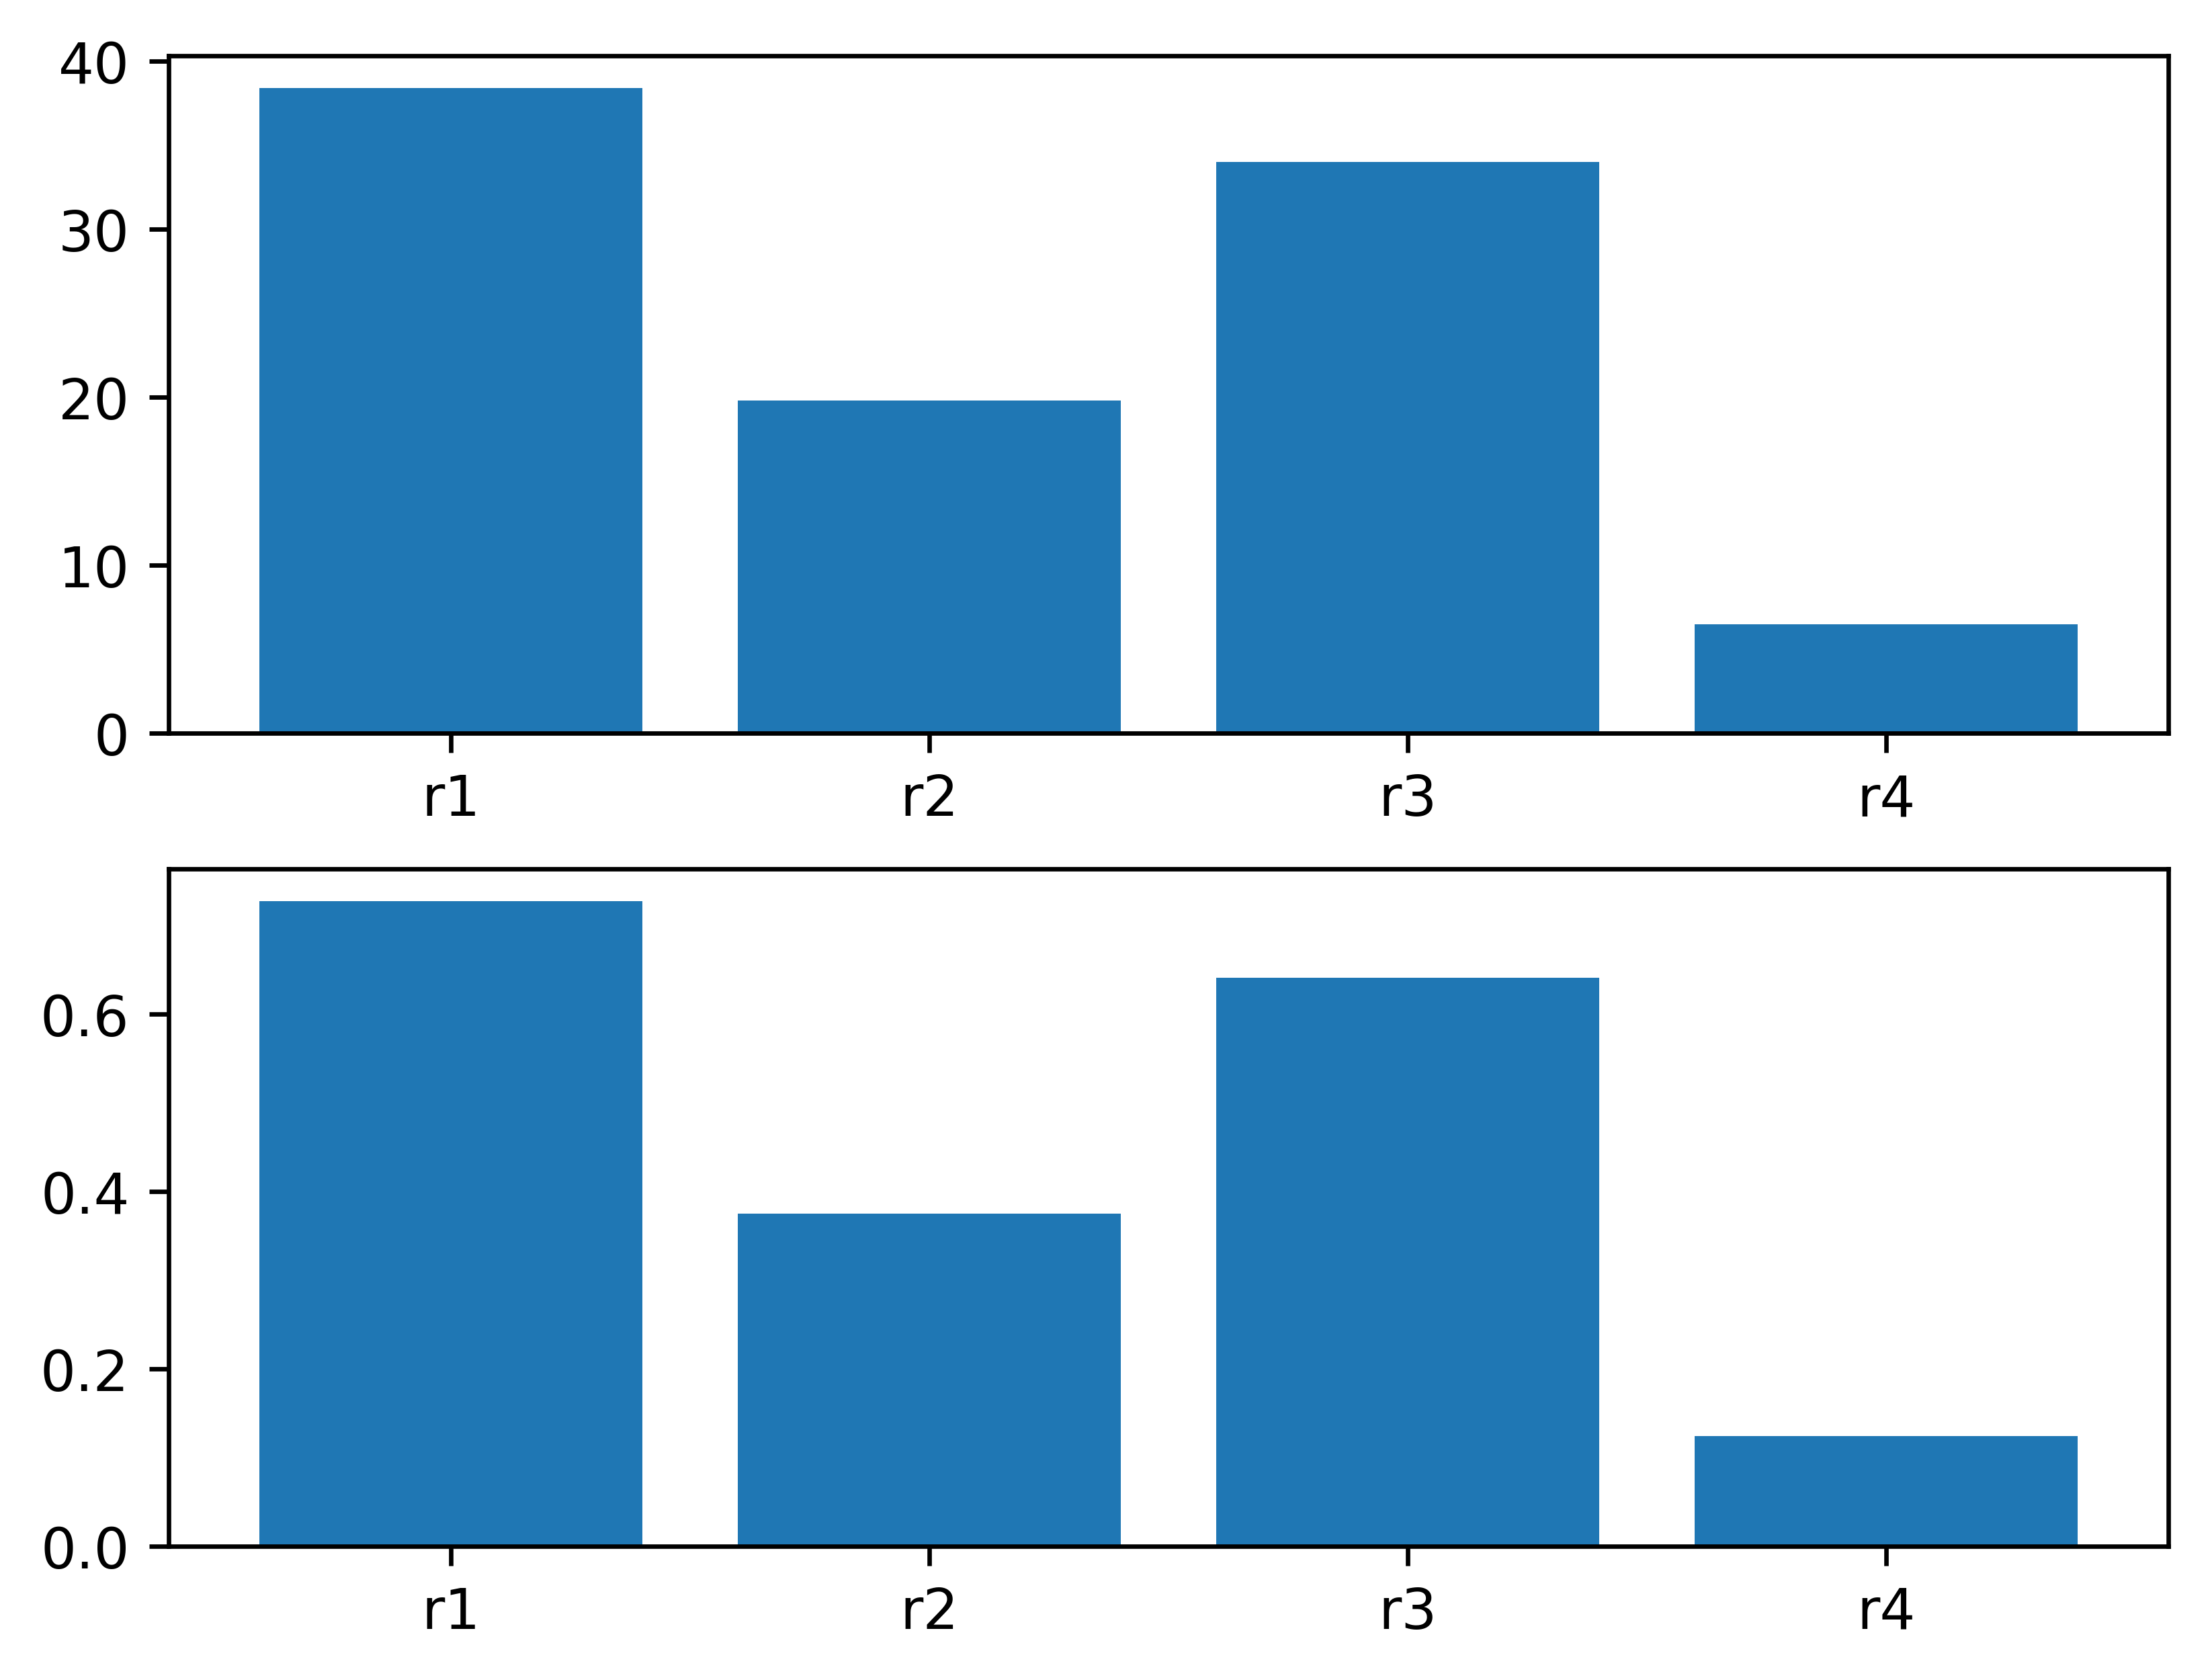

In [ ]:
dam_height = 232.1 #m

# average number of flood days per year
flood_days_1 = l1>= dam_height
flood_days_2 = l2>= dam_height
flood_days_3 = l3>= dam_height
flood_days_4 = l4>= dam_height

# aggregate as annual average

H = len(l1)
Ny = H/365
Jflood1 = [np.sum(flood_days_1['l1'])/Ny, np.sum(flood_days_2['l2'])/Ny, np.sum(flood_days_3['l3'])/Ny, np.sum(flood_days_4['l4'])/Ny] #average annual flood days


# flood magnitude
flood_magn_1 = l1[flood_days_1] - dam_height
flood_magn_2 = l2[flood_days_2] - dam_height
flood_magn_3 = l3[flood_days_3] - dam_height
flood_magn_4 = l4[flood_days_4] - dam_height

# aggregate as annual average
Jflood2 = [np.sum(flood_magn_1['l1'])/Ny, np.sum(flood_magn_2['l2'])/Ny, np.sum(flood_magn_3['l3'])/Ny, np.sum(flood_magn_4['l4'])/Ny] #average annual flood magnitude

plt.subplot(2,1,1)
plt.bar(labels, Jflood1)


plt.subplot(2,1,2)
plt.bar(labels, Jflood2)



generic indicators


In [ ]:
reliability_r1 = np.sum(r1>=D)/len(r1)

vulnerability_r1 = np.sum( np.maximum(D - r1, 0) ) / np.sum(r1 < D)

ad_r1 = np.sum((np.maximum(D - r1, 0 )) ** N )/ len(r1)

fails_r1 = np.maximum(D-r1, 0)
recover = 0
for k in range(len(fails_r1) - 1) :
  if fails_r1['r1'][k] != 0:
    if fails_r1['r1'][k+1] == 0:
      recover += 1

resilience_r1 = recover/np.sum(D >= r1)
print(resilience_r1)



r1    0.005076
dtype: float64


/usr/local/lib/python3.11/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
<ipython-input-62-00af07390eeb>:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if fails_r1['r1'][k] != 0:
<ipython-input-62-00af07390eeb>:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if fails_r1['r1'][k+1] == 0:




---

# Which release policy is best?
... it depends of what indicators we care about. Let's make some plots to highlight tradeoffs:

_The tradeoff between 2 indicators are well represented by a scatterplot:_

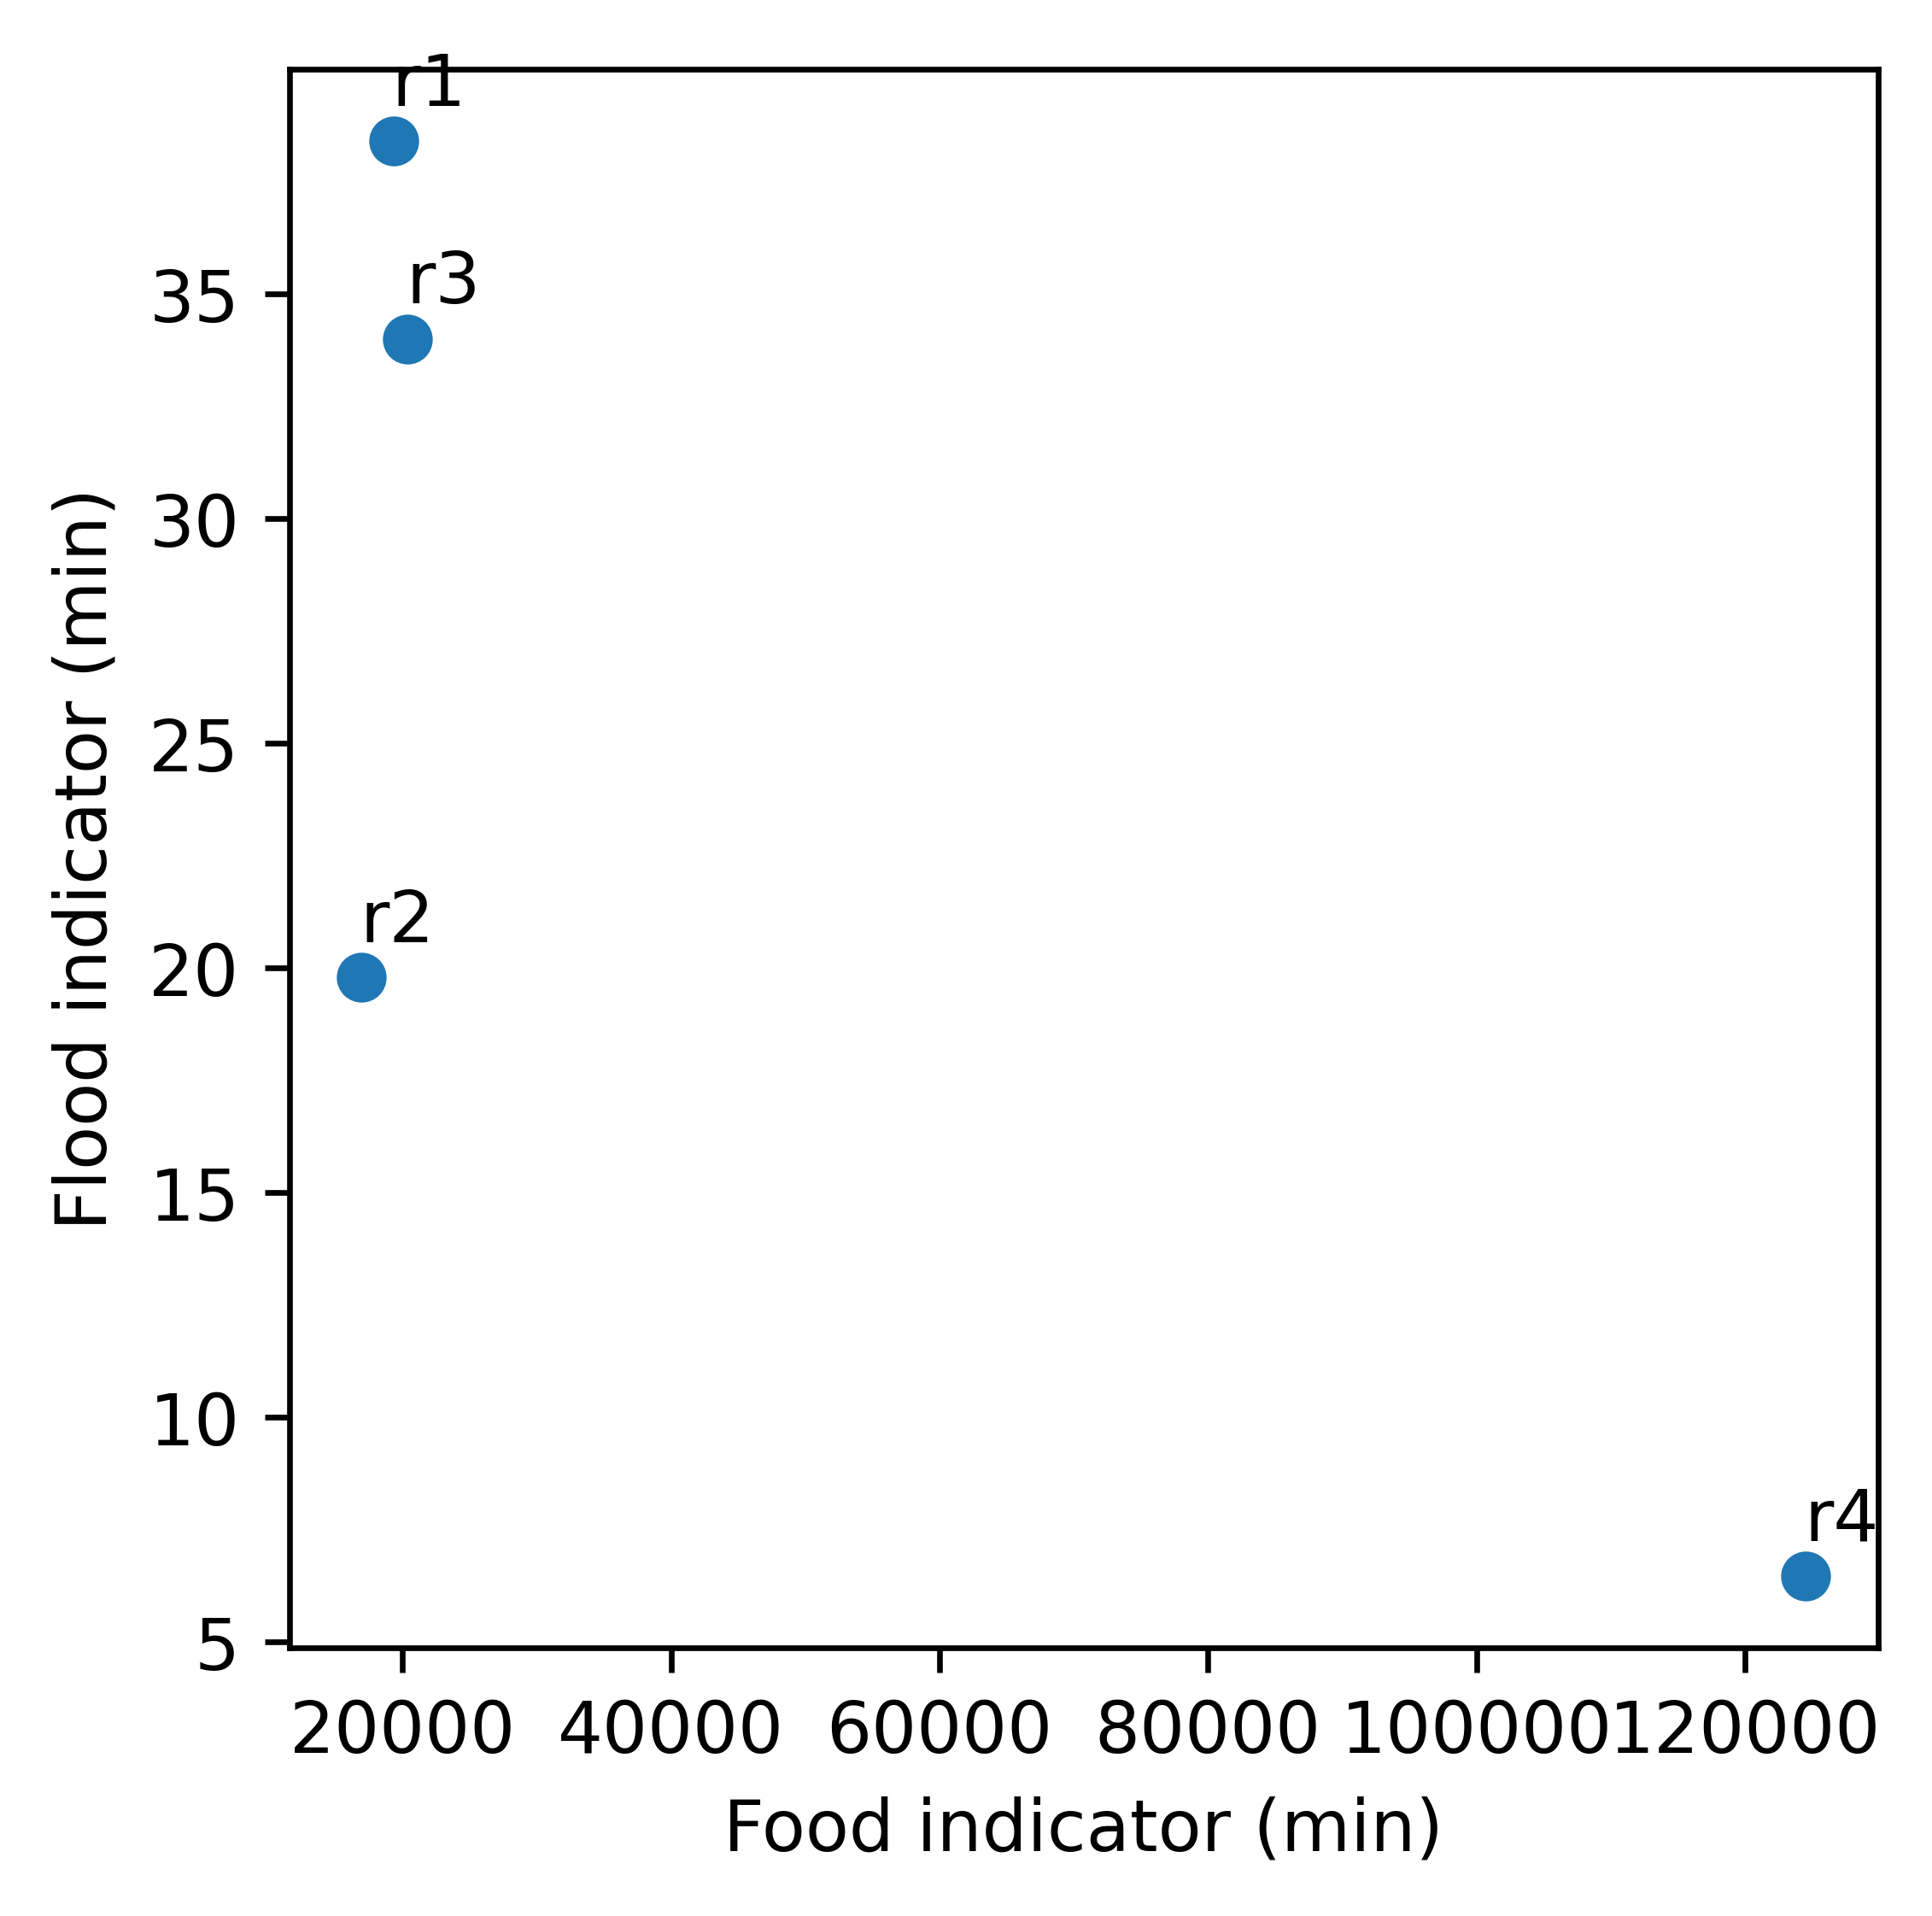

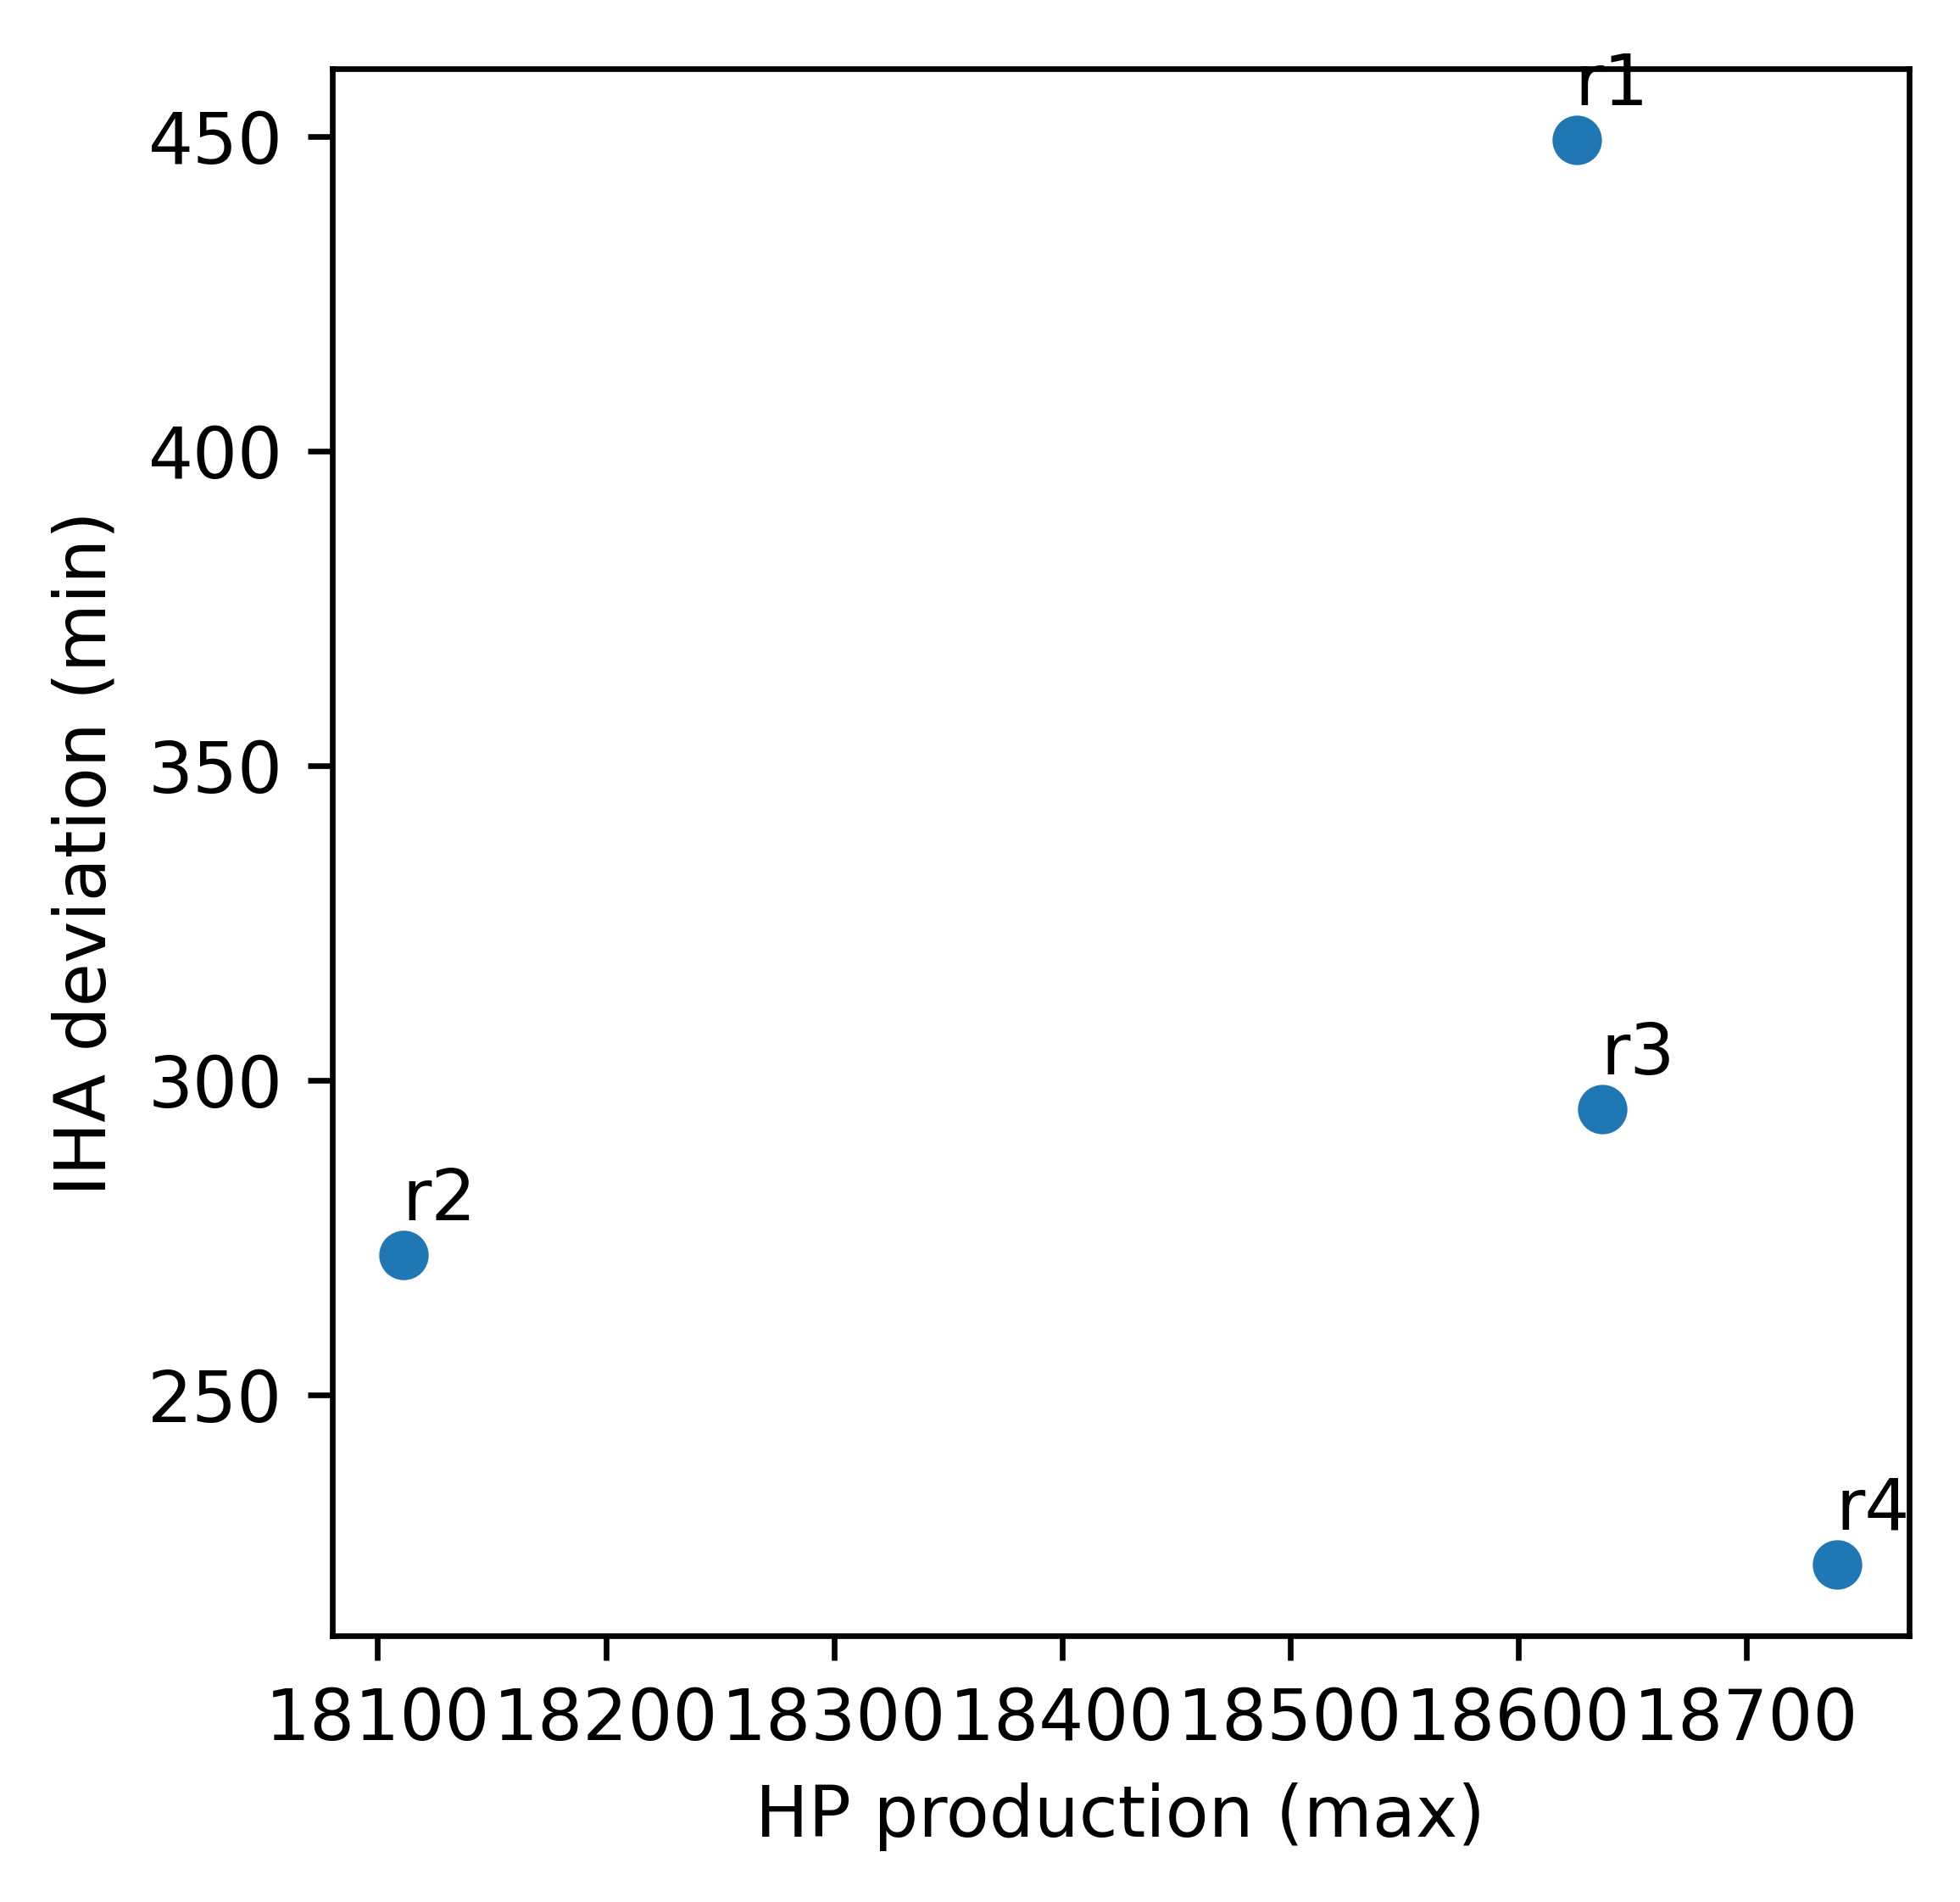

In [ ]:

# Set figure size
plt.figure(figsize=(4, 4))

# Create scatter plot
x = Jfood1
y = Jflood1

# Create scatter plot
plt.scatter(x, y)

# Label each point
for i, label in enumerate(labels):
    plt.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Label the x and y axes
plt.xlabel('Food indicator (min)')
plt.ylabel('Flood indicator (min)')

plt.show()





# Set figure size
plt.figure(figsize=(4, 4))

# Create scatter plot
w = Jenergy1
z = Jenv1

# Create scatter plot
plt.scatter(w, z)

# Label each point
for i, label in enumerate(labels):
    plt.annotate(label, (w[i], z[i]), textcoords="offset points", xytext=(5, 5), ha='center')

# Label the x and y axes
plt.xlabel('HP production (max)')
plt.ylabel('IHA deviation (min)')

# Display the plot
plt.show()

_The tradeoff between 3 indicators can be represented with a 3D scatterplot, or a 2D scatterplot with the addition of size or color:_

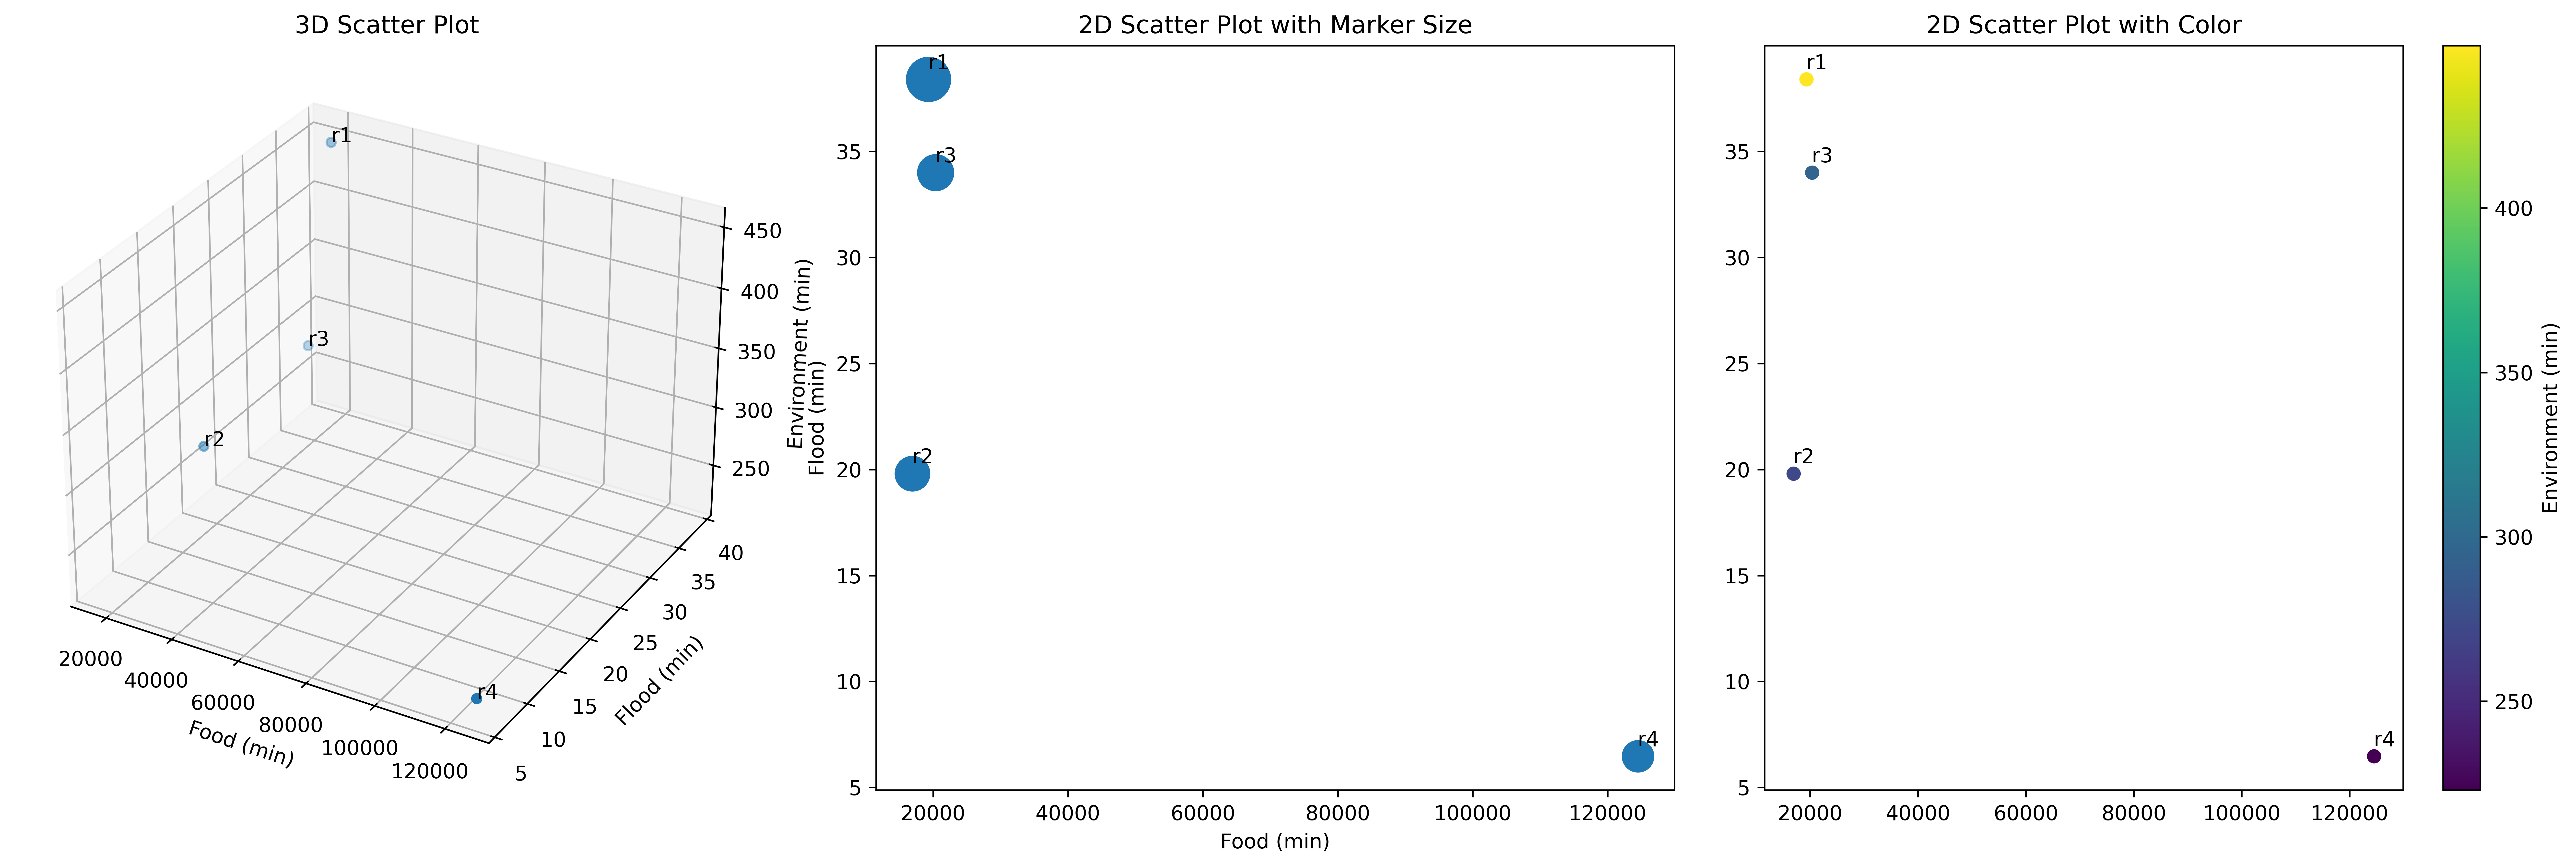

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure(figsize=(18, 6))

# First panel: 3D scatter plot
ax1 = fig.add_subplot(131, projection='3d')
sc1 = ax1.scatter(x, y, z)
ax1.set_xlabel('Food (min)')
ax1.set_ylabel('Flood (min)')
ax1.set_zlabel('Environment (min)')
for i, label in enumerate(labels):
    ax1.text(x[i], y[i], z[i], label)
ax1.set_title('3D Scatter Plot')

# Second panel: 2D scatter plot with marker size for the third dimension
ax2 = fig.add_subplot(132)
sc2 = ax2.scatter(x, y, s=z)  # scale marker size by z
ax2.set_xlabel('Food (min)')
ax2.set_ylabel('Flood (min)')
for i, label in enumerate(labels):
    ax2.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(5, 5), ha='center')
ax2.set_title('2D Scatter Plot with Marker Size')

# Third panel: 2D scatter plot with color for the third dimension
ax3 = fig.add_subplot(133)
sc3 = ax3.scatter(x, y, c=z, cmap='viridis')  # use z to color the markers
ax2.set_xlabel('Food (min)')
ax2.set_ylabel('Flood (min)')
for i, label in enumerate(labels):
    ax3.annotate(label, (x[i], y[i]), textcoords="offset points", xytext=(5, 5), ha='center')
ax3.set_title('2D Scatter Plot with Color')
plt.colorbar(sc3, ax=ax3, label='Environment (min)')

plt.tight_layout()
plt.show()


More dimensions are usually represented with a Parallel Axis plot:

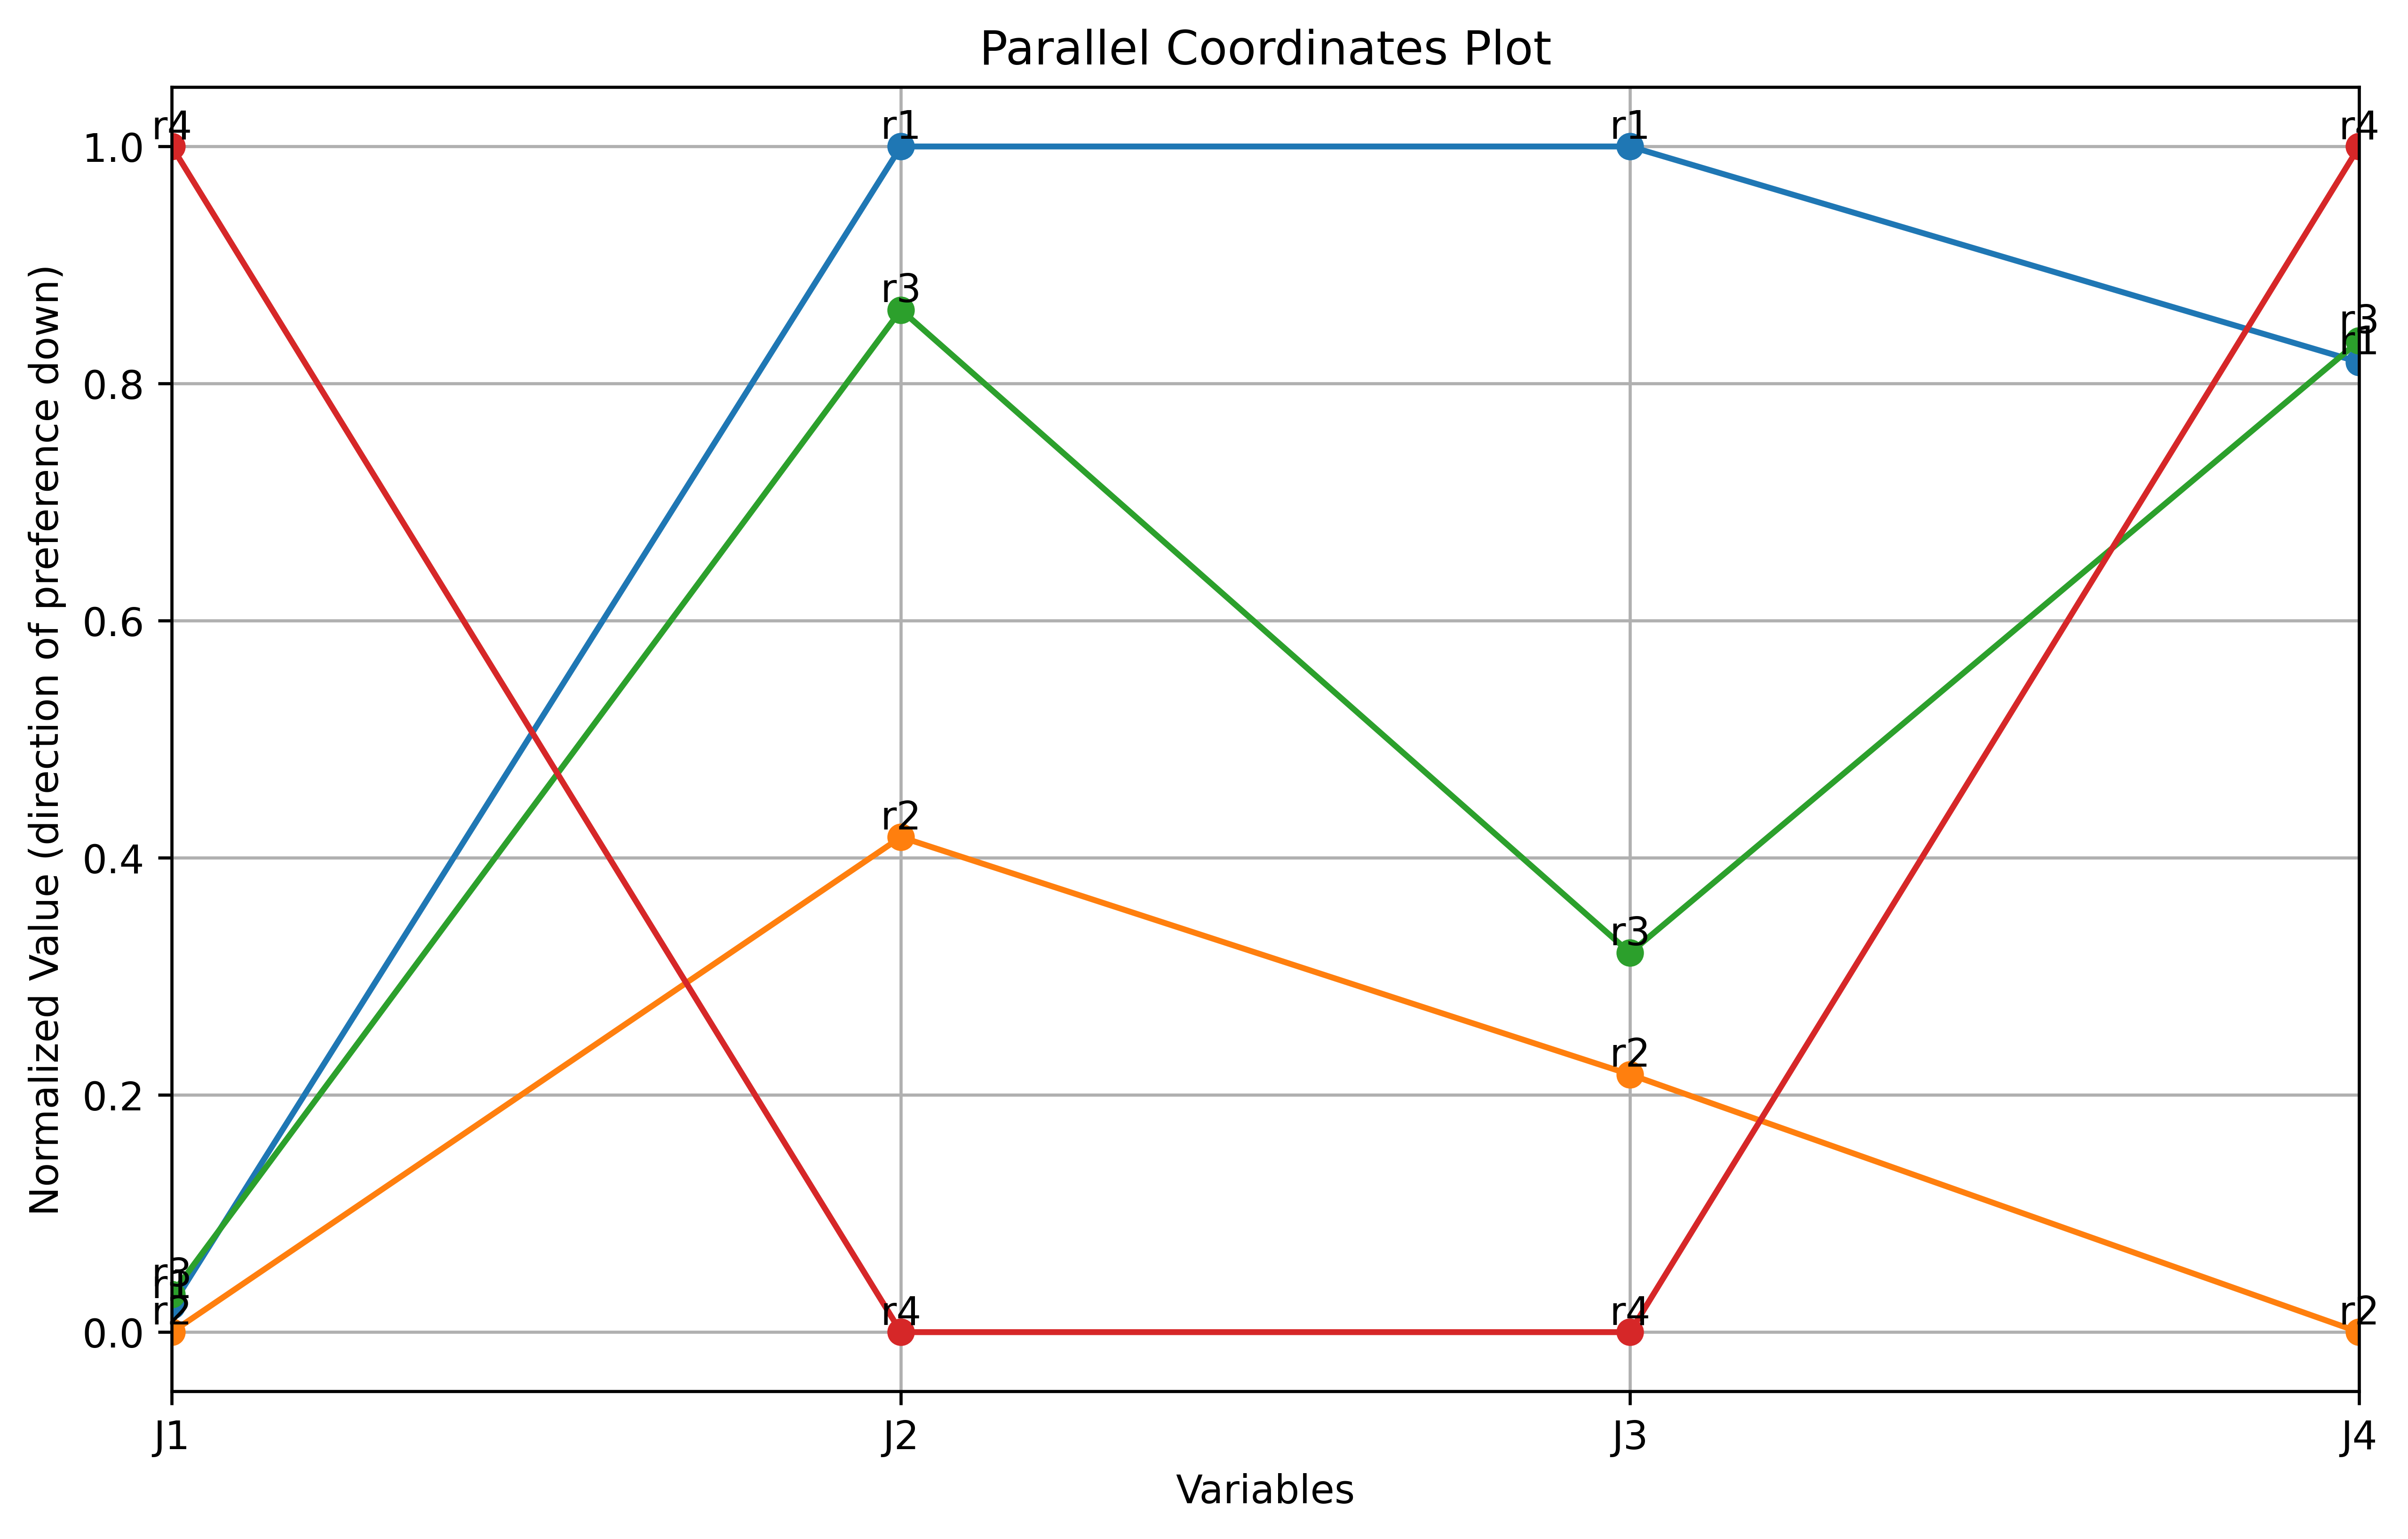

In [ ]:

# Combine the data into a single array
neg_w = w # the direction os preference for all indicator is minimum, except for HP production (w). We add the. minus sign to match direction of preference
data = np.vstack([x, y, z, neg_w]).T

# Normalize the data to 0-1 range for each dimension.
data_normalized = (data - data.min(axis=0)) / (data.max(axis=0) - data.min(axis=0))

# Number of variables
num_vars = data.shape[1]

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot each data point
for i in range(len(data_normalized)):
    ax.plot(range(num_vars), data_normalized[i, :], marker='o', label=labels[i])
    for j in range(num_vars):
        ax.text(j, data_normalized[i, j], labels[i], ha='center', va='bottom')

# Set the ticks and labels
ax.set_xticks(range(num_vars))
ax.set_xticklabels(['J1', 'J2', 'J3', 'J4'])
ax.set_xlim([0, num_vars - 1])

# Add grid lines for better readability
ax.grid(True)

# Set axis labels
ax.set_xlabel('Variables')
ax.set_ylabel('Normalized Value (direction of preference down)')

# Add a title
plt.title('Parallel Coordinates Plot')

plt.show()

